# <center> Text Summarization </center>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re


## TOC:


1. [Analysing the dataset](#analysing) <br>
2. [Creating a dataframe of 100 articles](#createdf) <br>
3. [Removing stopwords](#stopwords) <br>
4. [Lemmatizing cleaned words](#lemmatized) <br>
5. [Freq distribution of words in 1st article](#freq_dist) <br>
6. [Text Summarizer](#sent_summary) <br>
7. [Sentence Tokenization](#sent_token) <br>
8. [Cleaning the summary column to tokenize and to find dep tags](#postag) <br>

### Reading the dataset which consistes of only tech and automative articles

In [2]:
import pickle
filename = r'data/only_tech_automotive_articles'

getfile = open(filename, 'rb')
df = pickle.load(getfile).reset_index(drop=True)
getfile.close()
df.head(2)

,title,url,crawled_time,date,domain,author,content,topic_area
0,The US has its first case of the new Wuhan cor...,https://www.theverge.com/2020/1/21/21075647/us...,2020-03-27,2020-01-21,theverge,Nicole Wetsman,A case of the new virus spreading rapidly in C...,tech
1,Transportation shut down in city where new cor...,https://www.theverge.com/2020/1/22/21077545/co...,2020-03-19,2020-01-22,theverge,Nicole Wetsman,"Disease control officials in Wuhan, the Chines...",tech


<a id= 'analysing'></a>
## Analysing the dataset

In [3]:
df.describe()

,title,url,crawled_time,date,domain,author,content,topic_area
count,4523,4523,4523,4523,4523,4343,4523,4523
unique,4423,4504,141,233,12,383,4523,2
top,Facebook introduces new livestreaming features...,https://news.crunchbase.com/sections/startups/...,2020-03-19,2020-03-24,theverge,Kim Lyons,BOGOTA – Mexican home appliances manufacturer ...,tech
freq,17,2,538,95,1749,149,1,4256


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4523 entries, 0 to 4522
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4523 non-null   object
 1   url           4523 non-null   object
 2   crawled_time  4523 non-null   object
 3   date          4523 non-null   object
 4   domain        4523 non-null   object
 5   author        4343 non-null   object
 6   content       4523 non-null   object
 7   topic_area    4523 non-null   object
dtypes: object(8)
memory usage: 282.8+ KB


In [5]:
df.topic_area.value_counts()

tech          4256
automotive     267
Name: topic_area, dtype: int64

### Different domain(source of articles) contain different number of articles

In [6]:
df.domain.value_counts()

theverge            1749
venturebeat          871
techcrunch           715
news.crunchbase      311
bioworld             237
engadget             181
japantimes           180
computerweekly       163
autonews              55
eenewsautomotive      25
just-auto             24
biospace              12
Name: domain, dtype: int64

### Different topic area contain different number of articles

In [7]:
df.groupby('topic_area')['domain'].value_counts()

topic_area  domain          
automotive  computerweekly       163
            autonews              55
            eenewsautomotive      25
            just-auto             24
tech        theverge            1749
            venturebeat          871
            techcrunch           715
            news.crunchbase      311
            bioworld             237
            engadget             181
            japantimes           180
            biospace              12
Name: domain, dtype: int64

In [8]:
df.content[0][:1000]

'A case of the new virus spreading rapidly in China has been reported in a patient in Seattle, Washington, Reuters reports. The patient had recently returned from China, and is clinically healthy but still being monitored. This is the first US case of the virus, which was first detected in Wuhan, a city in central China in late December 2019. It has already sickened around 300 people and killed six. Despite the case report, the Centers for Disease Control and Prevention (CDC) said during a press briefing that they believe the threat to the US remains low. The virus is currently known as 2019-nCoV. The designation indicates that it is a coronavirus, the family of viruses that also caused the SARS outbreak in 2003. That outbreak killed nearly 800 people. “It’s bringing back SARS flashbacks for me,” says Timothy Sheahan, a coronavirus expert and assistant professor at the University of North Carolina Gillings School of Global Public Health. The US patient flew into Seattle-Tacoma Internat

In [9]:
#df.content= [x.lower() for x in df.content]

In [10]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Karthik
[nltk_data]     Pyapali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#df['tokens'] = [word_tokenize(x) for x in df.content]

In [12]:
df.head()

,title,url,crawled_time,date,domain,author,content,topic_area
0,The US has its first case of the new Wuhan cor...,https://www.theverge.com/2020/1/21/21075647/us...,2020-03-27,2020-01-21,theverge,Nicole Wetsman,A case of the new virus spreading rapidly in C...,tech
1,Transportation shut down in city where new cor...,https://www.theverge.com/2020/1/22/21077545/co...,2020-03-19,2020-01-22,theverge,Nicole Wetsman,"Disease control officials in Wuhan, the Chines...",tech
2,Rapid global response to the new coronavirus s...,https://www.theverge.com/2020/1/22/21077214/co...,2020-03-19,2020-01-22,theverge,Nicole Wetsman,Scientists think the new virus spreading rapid...,tech
3,Huawei developer conference postponed due to W...,https://www.theverge.com/2020/1/23/21078258/hu...,2020-04-08,2020-01-23,theverge,Sam Byford,Huawei has announced the postponement of a maj...,tech
4,World Health Organization says it’s too early ...,https://www.theverge.com/2020/1/23/21077335/co...,2020-03-20,2020-01-23,theverge,Nicole Wetsman,The World Health Organization (WHO) said today...,tech


<a id='createdf'></a>
## Creating a dataframe containing 100 rows of tech and automative articles only

In [13]:
df_copy=df.copy()

In [14]:
import string
def clean_text(s):
    s= s.lower()
    s = re.sub('[#|@]+[\w]+','',s)
    s = re.sub('http\S+','',s)
    s = re.sub('\w+\d\w+', '', s)
    s = re.sub('’','',s)
    s = re.sub('“','',s)
    s = re.sub('”','',s)
    for c in string.punctuation:
        s = s.replace(c," ")
    return s

In [15]:
df_copy.content = df_copy.content.apply(lambda x: clean_text(x))

In [16]:
df_copy.drop(columns=['title','author','date','domain','crawled_time','url'],inplace=True)

In [17]:
df_tech=(df_copy[(df_copy.topic_area=='tech')][:50]) 

In [18]:
df_auto=(df_copy[(df_copy.topic_area=='automotive')][:50]) 

In [19]:
df_auto = df_auto.reset_index(drop=True)

In [20]:
df_techauto = pd.concat([df_tech, df_auto], axis=0).reset_index(drop=True)

In [21]:
df_techauto.head(100)

,content,topic_area
0,a case of the new virus spreading rapidly in c...,tech
1,disease control officials in wuhan the chines...,tech
2,scientists think the new virus spreading rapid...,tech
3,huawei has announced the postponement of a maj...,tech
4,the world health organization who said today...,tech
...,...,...
95,abb has completedâ the acquisition of chinese ...,automotive
96,after a period of some passivity the uk gover...,automotive
97,the nhs is facing an unprecedented crisis the...,automotive
98,while much of the cyber security news agenda a...,automotive


<a id='stopwords'></a>
## Removing stopword using NLTK

In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Karthik
[nltk_data]     Pyapali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df_techauto.head()

,content,topic_area
0,a case of the new virus spreading rapidly in c...,tech
1,disease control officials in wuhan the chines...,tech
2,scientists think the new virus spreading rapid...,tech
3,huawei has announced the postponement of a maj...,tech
4,the world health organization who said today...,tech


In [24]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to C:\Users\Karthik
[nltk_data]     Pyapali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
df_techauto['cleaned_text']=''

In [26]:
for doc in range(len(df_techauto.content)):
    words = word_tokenize(df_techauto.content[doc])
    h2=''
    
    for w in words:
        
        if w not in stop_words:
                h2 = h2 + ' ' + w
               
    
    df_techauto.cleaned_text[doc]= h2 

<a id='lemmatized'></a>
## Lemmatizing the cleaned text

In [27]:
df_techauto['lemmatized_text']=''

In [28]:
for doc in range(len(df_techauto.cleaned_text)):
    words = word_tokenize(df_techauto.cleaned_text[doc])
    
    lemmatizedWord=''
    for w in words:
        lemmatizedWord = lemmatizedWord + lemmatizer.lemmatize(w) + ' '
        
               
    df_techauto.lemmatized_text[doc]= lemmatizedWord
    

In [29]:
df_techauto.head()

,content,topic_area,cleaned_text,lemmatized_text
0,a case of the new virus spreading rapidly in c...,tech,case new virus spreading rapidly china report...,case new virus spreading rapidly china reporte...
1,disease control officials in wuhan the chines...,tech,disease control officials wuhan chinese city ...,disease control official wuhan chinese city ou...
2,scientists think the new virus spreading rapid...,tech,scientists think new virus spreading rapidly ...,scientist think new virus spreading rapidly ce...
3,huawei has announced the postponement of a maj...,tech,huawei announced postponement major developer...,huawei announced postponement major developer ...
4,the world health organization who said today...,tech,world health organization said today early de...,world health organization said today early dec...


In [30]:
df_techauto['tokens']= [word_tokenize(x) for x in df_techauto.lemmatized_text]

In [31]:
df_techauto.head()

,content,topic_area,cleaned_text,lemmatized_text,tokens
0,a case of the new virus spreading rapidly in c...,tech,case new virus spreading rapidly china report...,case new virus spreading rapidly china reporte...,"[case, new, virus, spreading, rapidly, china, ..."
1,disease control officials in wuhan the chines...,tech,disease control officials wuhan chinese city ...,disease control official wuhan chinese city ou...,"[disease, control, official, wuhan, chinese, c..."
2,scientists think the new virus spreading rapid...,tech,scientists think new virus spreading rapidly ...,scientist think new virus spreading rapidly ce...,"[scientist, think, new, virus, spreading, rapi..."
3,huawei has announced the postponement of a maj...,tech,huawei announced postponement major developer...,huawei announced postponement major developer ...,"[huawei, announced, postponement, major, devel..."
4,the world health organization who said today...,tech,world health organization said today early de...,world health organization said today early dec...,"[world, health, organization, said, today, ear..."


<a id='freq_dist'></a>
## Freq distribution of words in 1st article

In [32]:
%pylab inline
from ipypublish import nb_setup
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


In [33]:
text = nltk.Text(df_techauto.tokens[0])

In [34]:
type(text)

nltk.text.Text

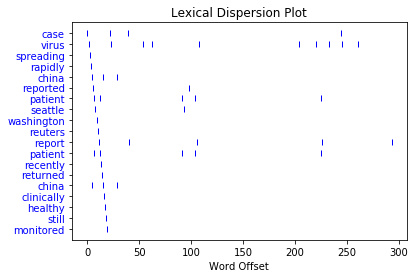

In [35]:
text.dispersion_plot([j for j in df_techauto.tokens[0][:20] if len(j)>3])

In [36]:
#FreqDist(text)

In [37]:
import nltk
from nltk.corpus import state_union

In [38]:
df_techauto['tagged']=[nltk.pos_tag(x) for x in df_techauto.tokens]

In [39]:
df_techauto.head()

,content,topic_area,cleaned_text,lemmatized_text,tokens,tagged
0,a case of the new virus spreading rapidly in c...,tech,case new virus spreading rapidly china report...,case new virus spreading rapidly china reporte...,"[case, new, virus, spreading, rapidly, china, ...","[(case, NN), (new, JJ), (virus, NN), (spreadin..."
1,disease control officials in wuhan the chines...,tech,disease control officials wuhan chinese city ...,disease control official wuhan chinese city ou...,"[disease, control, official, wuhan, chinese, c...","[(disease, NN), (control, NN), (official, NN),..."
2,scientists think the new virus spreading rapid...,tech,scientists think new virus spreading rapidly ...,scientist think new virus spreading rapidly ce...,"[scientist, think, new, virus, spreading, rapi...","[(scientist, NN), (think, VBP), (new, JJ), (vi..."
3,huawei has announced the postponement of a maj...,tech,huawei announced postponement major developer...,huawei announced postponement major developer ...,"[huawei, announced, postponement, major, devel...","[(huawei, NN), (announced, VBD), (postponement..."
4,the world health organization who said today...,tech,world health organization said today early de...,world health organization said today early dec...,"[world, health, organization, said, today, ear...","[(world, NN), (health, NN), (organization, NN)..."


<a id='sent_summary'></a>
## Text Summarizer

In [40]:
df_textsummarize=df.copy()

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
import string
def clean_text(s):
    #s= s.lower()
    s = re.sub('[#|@]+[\w]+','',s)
    s = re.sub('http\S+','',s)
    remove = string.punctuation
    remove = remove.replace(".", "")
    #s = re.sub('’','',s)
    #s = re.sub('“','',s)
    #s = re.sub('”','',s)
    for c in remove:
        s = s.replace(c," ")
    return s

In [43]:
df_textsummarize.drop(columns=['title','author','date','domain','crawled_time','url'],inplace=True)

In [44]:
df_textsummarize.content = df_textsummarize.content.apply(lambda x: clean_text(x))

In [45]:
df_textsummarize.content[0]

'A case of the new virus spreading rapidly in China has been reported in a patient in Seattle  Washington  Reuters reports. The patient had recently returned from China  and is clinically healthy but still being monitored. This is the first US case of the virus  which was first detected in Wuhan  a city in central China in late December 2019. It has already sickened around 300 people and killed six. Despite the case report  the Centers for Disease Control and Prevention  CDC  said during a press briefing that they believe the threat to the US remains low. The virus is currently known as 2019 nCoV. The designation indicates that it is a coronavirus  the family of viruses that also caused the SARS outbreak in 2003. That outbreak killed nearly 800 people. “It’s bringing back SARS flashbacks for me ” says Timothy Sheahan  a coronavirus expert and assistant professor at the University of North Carolina Gillings School of Global Public Health. The US patient flew into Seattle Tacoma Internat

In [46]:
type(df_textsummarize.content[0])

str

<a id='sent_token'></a>
## Sentence Tokenization

In [47]:
df_textsummarize['sentences']=''

In [48]:
import nltk
nltk.download("punkt")
from nltk.tokenize import sent_tokenize  
# To get separate sentences
for doc in range(len(df_textsummarize.content)):
    #print(df_textsummarize.content[doc])
    df_textsummarize.sentences[doc] = sent_tokenize(df_textsummarize.content[doc])


[nltk_data] Downloading package punkt to C:\Users\Karthik
[nltk_data]     Pyapali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
df_textsummarize.head(1)

,content,topic_area,sentences
0,A case of the new virus spreading rapidly in C...,tech,[A case of the new virus spreading rapidly in ...


In [50]:
df_textsummarize['summary']=''

In [51]:
import re
# Pass in a list of sentences, returns a n sentence summary
#def text_summarizer(sentences, n_summary):

for doc in range(len(df_textsummarize.sentences)):
    
    n = len(df_textsummarize.sentences[doc])
    n_summary=int(len(df_textsummarize.sentences[doc])/4)
    x = [re.split('[ ,.]',j) for j in df_textsummarize.sentences[doc]]
    jaccsim = array(zeros(n*n)).reshape((n,n))
    for i in range(n):
        for j in range(i,n):
            jaccsim[i,j] = len(set(x[i]).intersection(set(x[j])))/len(set(x[i]).union(set(x[j])))
            jaccsim[j,i] = jaccsim[i,j]
    #Summary
    idx = argsort(sum(jaccsim, axis=0))[::-1][:n_summary] #reverse sort
    print(idx)
   
    df_textsummarize.summary[doc] = [df_textsummarize.sentences[doc][j] for j in list(idx)]
    print(df_textsummarize.summary[doc])


[ 6  2 10 22 19  0]
['The designation indicates that it is a coronavirus  the family of viruses that also caused the SARS outbreak in 2003.', 'This is the first US case of the virus  which was first detected in Wuhan  a city in central China in late December 2019.', 'The patient was familiar with the reports of the Wuhan virus and shared them with his provider  and the positive test for the coronavirus came back yesterday.', '“The key issue we need to understand is how easily or sustainably the virus is spread from human to human ” says Nancy Messonnier  director of the National Center for Immunization and Respiratory Diseases at the CDC.', 'The virus that caused SARS  for example  originated in bats.', 'A case of the new virus spreading rapidly in China has been reported in a patient in Seattle  Washington  Reuters reports.']
[11  3 15 23 16 24 10]
['The WHO supports the decision to shut down transportation in and out of Wuhan.', 'The virus is similar to SARS  which circulated around 

['The game  in which players must try to infect the entire world with a deadly virus  experienced a surge in popularity last week as people learned more about the severity of the new coronavirus outbreak in China.', 'As the coronavirus outbreak continues to spread  the creators of a wildly popular game about viral outbreaks issued a statement last week reminding people that  while realistic  their game is just a game.', '“Please remember that Plague Inc. is a game  not a scientific model and that the current coronavirus outbreak is a very real situation which is impacting a huge number of people ” reads a statement on the company’s website.']
[25 24 23 22 21 20]
['Equity drops every Friday at 6 00 am PT  so subscribe to us on Apple Podcasts  Overcast  Spotify and all the casts.', 'Equity drops every Friday at 6 00 am PT  so subscribe to us on Apple Podcasts  Overcast  Spotify and all the casts.', 'Equity drops every Friday at 6 00 am PT  so subscribe to us on Apple Podcasts  Overcast  

[35 15 48 70 36 38 68 34 23 41 42 37 14 17 10 11 16 32  3 60]
['⭐ The department of justice is arranging interviews with Facebook rivals to learn more about the competitive landscape of the social media industry.', 'But for the most part  false claims seem to have stalled out in the low thousands of shares.', 'Matt Flegenheimer  Rebecca R. Ruiz and Nellie Bowles   The New York Times  A reporter for The New York Times was the target of a phone hack that appears to have originated with the Saudi Arabian government.', 'But almost 400 million of the accounts appear to be bogus.', 'The interviews are part of the antitrust probe that was announced last September.', 'The email gives a view into how the DOJ is framing its antitrust probe into Facebook  the existence of which was first revealed in September of last year.', 'That could be because the cost of breaking up Facebook is more obvious than it is for other big companies.', 'The investment is going to projects including The Advocate in D

[ 4 24 52 29 61 14 59 58 13 21 26  1 10 15  7 20 25]
['The thing about this update that may grab some attention is that it is moving to a subscription model.', 'If there’s any feature in Fantastical 2 that is now a Fantastical Premium feature  you will still be able to use that feature in the updated app on the platform you own it on  even without a Premium subscription.', '└ Grubhub lets customers order from restaurants that never agreed to be on its platform The increased competition in the food delivery space is leading to a lot of scummy practices.', 'If you’re in need of a distraction from the news  several gaming publishers and developers have made their games cheap  or in some cases free  to lighten the mood.', 'So the commission spent the last several years setting up a scheme to make it all work.', 'Subscribe to all of The Verge’s great videos here  By subscribing  you are agreeing to receive a daily newsletter from The Verge that highlights top stories of the day  as well as 

[ 6  3 27  4 23  9  8 11 19]
['He claims to be a Harvard epidemiologist  and on paper that s true.', 'I happen to have a little list.', 'Sheesh.', 'Purveyors of misinformation.', 'It’s apples to zebras.', 'He s fanned the flames of numerous  conspiracies.', 'He s a nutritionist  not an infectious disease epidemiologist.', 'Science itself.', 'General innumeracy.']
[3 4]
['In a statement  Twitter said only that it had banned Zero Hedge for violating the social network s  platform manipulation policy.', 'However  Zero Hedge said it had received a notice on Friday that it was violating Twitter policies against  abuse and harassment.']
[4 5 0]
['Related China has always been an important part of Formula E. The young racing series’ inaugural race in September 2014 took place in Beijing  and Formula E also kicked off its second season in 2015 with a race in the capital city.', 'Formula E returned to China during its fifth season after striking a deal to race on the streets of Sanya  and has r

 116  72  86  87  74  56  14  93  68  71  99  66  70  46]
['Facebook is useful  but it is useful mainly in the way that a phone book is useful.', 'They’re focused on misinformation related to the candidates and voting.', 'YouTube  Google is limiting access to key tools that track ad spending  a move that could disrupt hundreds of marketers who rely on the tools to do their jobs.', 'It goes on to show a bunch of jobs that were eliminated by automation.', 'It’s part of the company’s policy to remove content that could cause physical harm.', '“Show me photos of me and Loretta ” also featured in the ad  works much better.', 'The company was storing the passwords of linked Instagram accounts in plain text.', 'It also had a much higher ratio of dislikes to likes than either of the other two ads.', 'Phil  Oh I’d love to but 2 miles is quite a lot for a burrowing rodent and I’m afraid I’m not allowed on the subway.', 'In it  an elderly man tells the Google Assistant a series of things he wants

[83 54  4 51 29 43 41 94 71 65 92 72 26 60 25 44 57 32 68 76 38 63  5 59
  2 91]
['The company has shipped a new version of the app to fix the flaw.', 'Shadow  the company behind the Iowa caucus app  is part of a web of startups connected to the well funded nonprofit Acronym.', 'The institutions that prop up our democracy — that uphold the rule of law — are eroding.', 'I said over and over again trust is the product of transparency times communication.', 'And then there are the small few that go viral and do lots of damage.', 'Today in news that could affect public perception of the big tech platforms.', 'Many of the concerns I have about Big Tech are rooted in the sheer size of the companies  and all the unintended consequences that come with scale.', 'It’s the latest example of the platform’s cultural relevance — and of the way stars are eternally damned to master new platforms if they hope to maintain their place in the zeitgeist.', 'Anne Quito   Quartz  Companies like WeChat and By

['Just a few weeks ahead of Mobile World Congress 2020  two marketing images of the LG V60 ThinQ have leaked.', 'Despite the change of plans  I wouldn’t expect it to bring much of a delay for the phone’s announcement  so stay tuned.', 'This big of an increase in power is notable  though it can’t mean anything good for the phone’s thickness since the V50 was already a bit chunky.']
[0]
['Xiaomi has announced that it will launch its new Mi 10 smartphones on February 13th in China with a global launch to follow on February 23rd  the day before Mobile World Congress kicks off in Barcelona  Spain  via Android Authority .']
[18  8  9 10  3]
['According to Crunchbase data at time of publishing  no supergiant rounds have been struck so far in China during the month of February.', 'According to Crunchbase data at the time of writing  January 2020 saw fewer supergiant VC deals than in any month since February 2017  almost exactly three years ago.', 'What’s going on  Much like how Thanksgiving an

[35 32  2  3 10 47 53 15 39 22 11  6 82 21 80 97 49 26 48 14 30 25 31 65
  0 17 63 16 60  8 62]
['The first is to let everyone fight it out in a feed  and do some light curating around the big moments.', 'That’s a win for the company.', 'One is a redesign of the app for Android and iOS that provides a new home for the Snap Map and the company’s original video programming.', 'The other is a test of breaking news headlines inside the app that injects timely news briefs into Snapchat to complement the existing magazine style stories on the Discover page.', 'You’ll be able to see where you are within the app at a glance  and move directly from screen to screen with a single tap instead of swiping.', '“We are in the very early stages of exploring how to evolve news offerings on Snapchat ” the company said.', 'As the app grows up  it’s working to become a more welcoming place.', 'Snapchat has added uses for the past four straight quarters  and is now used by 218 million people a day.', 'The 

[21 16  4 11 26 13]
['At Oracle Open World in London last week  and just before  Brian says he spoke to a series of senior Oracle executives  raising the battle for ECC6 customers with SAP as one point of conversation.', 'Brian says on the podcast that the war between SAP and Oracle is hotting up  and that was in evidence at last week’s Oracle Open World in London.', 'The other main topics discussed in this episode are the intensifying Oracle vs SAP cloud applications dog fight  and a Goldman Sachs cloud service for its financial services peer companies   an instance  as Caroline puts it  of “coopetition”.', 'From this date  all medium to large private sector organisations will assume responsibility for determining how the contractors they engage with should be taxed  based on the work they do and how it is performed.', 'Two outcomes of that are research projects at the University of Bristol  one to combat the tropical disease Chikungunya', 'There were  reports Caroline  around 700 pro

[24 17 51 22 89 27 35 23 63 10  8 29 65 90 70 13 42 20 14 92  5  9 82]
['Which isn’t to say that platforms won’t play a big role in the election.', 'It was indeed the opinion of the other candidates on stage  and possibly the moderators  and definitely the people I happened to be watching the debate with  that Bloomberg was chicken liver.', 'Here’s a long magazine piece about what happened to some of the employees who spoke out.', 'National polls suggest that Sanders is in the lead.', 'Protesters have smashed the windows of buses carrying evacuees and set fire to makeshift barricades.', 'Today in news that could affect public perception of the big tech platforms.', 'The move is part of a new policy to target misinformation  which the company plans to roll out on March 5th  reports NBC’s Ben Collins.', 'It seems increasingly plausible that after March 3rd  Sanders will be the presumptive nominee — and the entire story about Bloomberg  platforms  and money will be a footnote in history.'

[52 47 83 10  2 48 39 36 80 54 56 72 26  1 81 51 78 25  0 19 11 64 23 50
 49]
['But it seems like a step in the right direction to me.', 'But for the most part  what we choose to look at should be our business — whether that happens online  in a library  or in a grocery store.', 'Preparing for a US outbreak is going to require ample medical resources  robust communication  and  most importantly  the public trust.', 'Processor is also a YouTube series with the same goal  providing smart and surprising analysis with a bit of humor.', 'First  Firefox is turning on a controversial new encryption methodology by default in the US.', 'And yet the default assumption online is that certain companies get to gather and use that information.', 'That’s because it shifts the Overton Window for privacy  just a bit.', 'The decision is controversial on a number of fronts.', 'Russell Brandom explains why it’s so dangerous for people in positions of authority to play fast and loose with the facts.', 'For

[44 53 45 60 11 14 52 34 15 51 56  0 10 55 43  4]
['In practice  LG is going to have a tough time  at least here in the US.', '┏ Google is teaming up with Adidas and EA for a new Jacquard product.', 'Samsung spends a lot of marketing dollars and LG tends to disappoint on camera quality.', 'He’s going to take a position to still be deeply entwined with the company.', 'Processor is also a YouTube series with the same goal  providing smart and surprising analysis with a bit of humor.', 'Nine times out of ten that update does very little to change the fundamentals  but there’s always a chance.', 'Even the already announced X100V might be hard to come by for a while.', 'If you’re in need of a distraction from the news  several gaming publishers and developers have made their games cheap  or in some cases free  to lighten the mood.', 'Samsung does have a history of scrambling and successfully dealing with phone problems  after all.', 'The goal is to have the X T4 out sometime in April  but u

[ 8 10  4 13]
['Apple and Microsoft were the hardest hit  with their shares off 6.5  and 7   respectively.', 'SaaS stocks wound up down 2.7   while the Nasdaq itself closed off 4.6 .', 'It was only minutes after the press conference concluded that the Centers for Disease Control and Prevention issued a statement that the U.S. had identified its first case of community infection — when a person who was not known to have traveled outside of the U.S. or had been in contact with anyone who had been infected with the virus was diagnosed with the disease.', 'Instead  after reaching fresh highs on the 19th  the Nasdaq is worth just a bit over 8 500 on the 27th.']
[0]
['Hello and welcome back to our regular morning look at private companies  public markets and the gray space in between.']
[5 2]
['Epic Games announced it would also be pulling out of the event Thursday.', 'Instead of holding a physical event at the conference  Microsoft says it will be holding an online only event that week.']
[

[ 32 111  16  47  15  51  46  36   1  40  67  22  65  14  11  10  52  37
   0 130  57  59  29  21  86   2  31 103  94  61  33 113  48  73]
['That  I suspect  is more how social media is polarizing  political elites are on Twitter every day  and for all the warnings that Twitter isn’t real life  it feels like real life to them.', 'The move is part of the company’s attempts to address ethical issues earlier in the design and engineering processes.', 'I cite  for instance  a well designed experiment in which Democrats and Republicans on Twitter were paid to follow people from the other side.', 'I have a longer discussion in the book about the kind of speech and voices that are selected for by algorithms that are sorting off the intensity of emotional response  but I don’t think it’s a great foundation atop which to structure political communication.', 'There’s also not much evidence for the echo chamber effect  at least not in the way people tend to think of it.', 'In general  I don’t thi

[33 26 30  2 19 11 18 25 10]
['The student had not had any contact with people known to have the virus  and the source of their infection remains unknown.', 'In Oregon  an elementary school worker who hadn’t had contact with any confirmed case — and who hadn’t traveled to areas known to have the virus — was tested for the disease.', 'One case involved a woman who had recently traveled to an area in South Korea where the virus was spreading.', 'The Washington Post first reported news of the second case of community transmission in the US — a 65 year old woman who had no known history of travel to any of the countries that have been hardest hit by the disease.', 'The woman apparently had no connection to any patients who were confirmed to have the disease  and had also not traveled to any area where the virus is known to be circulating.', 'Until this week  the Centers for Disease Control and Prevention had only tested people who had traveled to one of the most affected areas or had been 

[ 2  1  0 11  5]
['Microsoft plans to do the same with its MVP Summit.', 'Google says it will be making its Cloud Next conference — an enterprise focused meetup dedicated to G Suite and other cloud computing tools and by attendees the largest Google conference — into a “digital first” event.', 'Google and Microsoft both announced on Monday that two industry conferences  Google’s Cloud Next in San Francisco and Microsoft’s MVP Summit in the Seattle suburbs of Bellevue and Redmond  are being cancelled due to the ongoing coronavirus outbreak.', 'Neither Google nor Microsoft has publicly announced any plans to postpone or cancel their developer conferences as of now  but moving Cloud Next and MVP Summit to “virtual events” could be the first step toward making a similar decision for I O and Build.', 'The company plans to refund attendees both the cost of tickets for the event and hotel stays  and all registered attendees will be given access to the digital version of the event instead  Goo

[34  4  0 44  9 30 40 33 20 43 22 28]
['The deep learning model showed a performance comparable to expert radiologists and improved the efficiency of radiologists in clinical practice.', 'A World Health Organization report released last month said that AI and big data are a key part of the response to the disease in China.', 'The spread of the COVID 19 coronavirus is a fluid situation changing by the day  and even by the hour.', 'The deep learning model is trained with CT scans of influenza patients  COVID 19 patients  and healthy people from three hospitals in Wuhan  including 219 images from 110 patients with COVID 19.', 'UC Berkeley robotics lab director and DexNet creator Ken Goldberg predicts that if the coronavirus becomes a pandemic  it may lead to the spread of more robots in more environments.', 'The 40 page WHO China Mission report released last month about initial response to COVID 19 cites how the country used big data and AI as part of its response to the disease.', 'The w

[ 73   4  96  29  38 101  74  12  42  41   1   9  23  57  63  78  48  24
  82 106  25 103  13   0  35   2  11]
['This is a situation that will either resolve itself to the relief of everybody as software catches up... or it won’t.', 'Instead  the rollout began yesterday and should theoretically be completed for all users in a couple of weeks.', 'YouTube seems like a piece of the internet that’s always been there  been the way it is.', 'The answer to why it only works in certain apps is that a lot of Android developers aren’t using standard APIs for long press actions.', 'For the record  Apple’s GarageBand has a sort of software based detector for how hard you are pressing  but it uses the accelerometer.', 'The  120 price of a second box.', 'The latter option is a bit of a worst case scenario  coming on the heels of the bad Trashcan Mac years and the years waiting for this new modular design.', 'Processor is also a YouTube series with the same goal  providing smart and surprising analys

   5  50   6  27  51  90  36 123 110  68  52  34  19]
['Facebook is expected to emphasize the digital versions of existing government currencies in its own wallet.', 'Twitter is a little bad  and its founder is in the crosshairs of big scary Elliott  Snap is worse  and its founders are fine because they had the foresight to prevent this.', 'The fate of encryption is critical for the company  given that its messaging service  WhatsApp  is secured this way  and Facebook aims to deploy encryption further across its chat tools.', 'The activist investor Elliott Management Corp. has taken a roughly 4 percent stake in Twitter and has now put forth four nominees to the company’s board  with the goal of replacing Dorsey as CEO.', 'The initial rollout of the wallet  which Facebook hopes to have available in WhatsApp and Messenger  could be restricted to certain countries based on the local currencies that it ultimately supports.', 'Unless something changes dramatically  it would appear that Jack

[45 67 79 82 24 18 20 49 61 42  5 27 69 23 40 64 73 71 56 48 72 70]
['8 06AM  I am leaning on my right hand.', '9 17AM  Went to the bathroom and washed my face so I could touch it with impunity.', '9 57AM  Leaning on my hand.', '9 58AM  Rubbed my eye.', 'Also my neck.', 'Also  does touching my hair count as touching my face  I decide to wear a ponytail.', '6 43AM  I lean the side of my face into the palm of my hand to read something  a habit and a mistake.', '8 17AM  Scratched my lip.', '8 54AM  Leaning on my right hand to read again.', '7 59AM  Rubbing my eye.', 'Not touching my face  though  is the real challenge.', 'As long as both hands are occupied  I can’t touch my face.', '9 21AM  What am I supposed to lean my chin on  if not my hand  9 23AM  Lips.', '6 47AM  Scratched my cheek.', 'I’m going to keep touching my face  apparently my favorite thing  at home.', 'I’m trying  Karen  8 58AM  I am definitely not noticing every time I touch my face in this diary.', '9 35AM  Eyes.', '9 33

[96 94 52 10 45 63 79 65 49 47 72 39  5 44 32  9 34 62 43 78 42 21 84 14]
['The injury is the latest in a series of mishaps spurred by the viral TikTok challenge.', 'TikTok is a platform for discussing social issues  whether the company wants it to be or not.', 'Trending down  Cisco is helping administrators in Jammu and Kashmir build a firewall as access to internet begins to open up in the Valley.', 'The essence of the feed  after all  is personalization — Facebook wants to show you only things it has some reason to believe that you will care about  whether it’s because you are friends with a person or liked a page.', 'Not in a legal sense — Section 230 is still the law of the land — but in a moral sense.', 'Jay Peters   The Verge  The TED conference in Vancouver is planning to either postpone the event or host a digital only version due to the coronavirus.', 'Meanwhile  a Chinese style social credit system continues to take shape here in the United States.', 'The group took issue wi

[ 99  46  18  38 104  63  23  72  55  22  44  54  69  80  36  91  48  97
   9  41   8  56  15  39  42  78  10  33 106]
['The news comes after a year of increased scrutiny for the company.', 'The company said it had blocked tens of thousands of ads attempting to capitalize on the outbreak.', 'And the company has reinvested in its core product  leading to a notably productive 2019.', 'The company denied the report.', 'Before Clearview AI became a tool for law enforcement  the rich used it to surveil people at parties and on dates.', 'On the conference front  Apple and Netflix pulled out of South by Southwest due to coronavirus concerns.', 'The question is how well you can prepare for Elliott  a hedge fund that once waged a 15 year battle against the government of Argentina and won.', 'The news has has reignited a debate about an existing ban the government has against Skype  WhatsApp  and FaceTime.', 'Kurt Wagner   Bloomberg  Salesforce is encouraging all employees in the Seattle area to

[ 1 24  2 51 48 46  7 23 25  8 45  9 47]
['The problem is that Contagion isn’t streaming anywhere — especially in the United States — leading to an increase in rentals on iTunes and torrent downloads.', 'That is proving to be accurate.” Rentals and torrent downloads are also increasing in part because Contagion isn’t available via any of the popular subscription streaming services in the United States.', 'The Verge partnered with TorrentFreak to examine the rise of people downloading Contagion between January 1st and March 4th.', 'The interest is skyrocketing  and the ninth most searched query after just the movie title is “where to watch Contagion ” The 19th  20th  and 21st queries are “Contagion Netflix ” at the time of this writing.', 'Overwhelmingly  the majority of the Top 10 lists tend to be Netflix Originals.', 'Netflix rolled out its “Top 10” list in the United States a couple of weeks ago  after testing in the United Kingdom  and plans to enter more countries soon.', 'There ar

[39 10  1 28 33 16 35 13 60 20 47 25 22  9  6 45 56 49]
['So I have to wait in line for the results.', 'States are reporting results quickly and even — states are reporting results quickly and in the event of a discrepancy between CDC and state case counts  the state case counts should always be considered more up to date.” A coronavirus  COVID 19  test kit from the CDC.', '“We now are seeing community spread and we’re trying to help people understand how to mitigate the impact of disease spread ” U.S.', 'However  the inability of the CDC and federal public health officials to respond quickly enough was soon apparent throughout February.', 'As recently as Friday  a nurse at a hospital in California was being denied access to the coronavirus test.', 'In that world  the CDC would not have needed to impose severe restrictions on who could be tested for the virus  because they would not have needed to limit the number of tests they could conduct to only the most pressing — or obvious — cas

[ 7 14  6  4  3]
['“That also applies if you might already have been back in the office after your return.” Those staff who have been teleworking for 14 days already after a trip are told they can return to the office — “provided that you have absolutely no symptoms and none of your family members has been infected”.', 'Although the email notes that this decree does not apply retroactively — and staff who returned to work last week from one of the affected regions are specifically told they can come to work.', '“If during the last 14 days you have been in one of the areas or clusters that have been added  you must stay at home for 14 days following your return ” is the latest instruction to parliament staff.', 'Parliament staff who have traveled to a high risk zone for the spread of the infection — listed in the email as  China  Hong Kong  Macau  South Korea  Singapore  Iran  Japan and regions of Northern Italy — had previously been instructed to self isolate for 14 days after returnin

[60 13 18 53 40 28 56 17 10 46 14 67  5 12  1  2 49]
['┏ Images of the Pixel 4A in a fabric case may have leaked.', 'Processor is also a YouTube series with the same goal  providing smart and surprising analysis with a bit of humor.', 'I am sympathetic to the argument that it’s Apple’s platform so it can do whatever it wants with it — but only to a point.', '┏ The Moto 360  2019  is a familiar blend of good hardware and bad software.', 'If you’re in need of a distraction from the news  several gaming publishers and developers have made their games cheap  or in some cases free  to lighten the mood.', 'Now calls for people to work from home are commonplace  all of Italy is locked down  and you don’t need me to tell you that the stock market lost its shit yesterday.', 'The question is  Is it worth the money  If you compare it to something like Samsung’s 40mm Active 2  then the Moto 360 doesn’t seem like much of a bargain.', 'I am intrigued by the possibility of Apple releasing black headp

['Presented by WorkRamp As governments and health organizations mobilize to curb the spread of coronavirus  COVID 19   global companies are also playing a critical role in keeping their organizations safe with a simple policy  work from home.', 'Whether your company is embracing a work from home policy for the first time or readying an entire organization into going remote  this can be a tricky period to navigate.', 'The real challenge around remote work is finding ways for employees to feel connected to each other and the company when they are physically apart.', 'But this is the first time companies are seeing what happens when a distributed work force is stress tested by hundreds of thousands of employees at massive organizations like Twitter  Facebook  and Google.', 'See why companies like Zoom  Square  and Slack trust WorkRamp to train their teams and customers by visiting  Sponsored articles are content produced by a company that is either paying for the post or has a business re

[27 26 57 11 12 38  9  3  7 13  1 59 33  0 64 29 70 74 62]
['At a certain point the sheer size and power of these companies make us feel in our guts that the rules ought to be different.', 'And that right there is the crux of it.', 'Now Pixel 4  with the 4A repeating the pattern  with a side of better battery life to boot .', 'You can subscribe to Processor and learn more about it here.', 'Processor is also a YouTube series with the same goal  providing smart and surprising analysis with a bit of humor.', 'If you’re in need of a distraction from the news  several gaming publishers and developers have made their games cheap  or in some cases free  to lighten the mood.', 'Dieter writes about consumer tech  software  and the most important news of the day from The Verge.', 'Maybe Apple will also let us put apps in arbitrary places on the home screen  too  instead of forcing them all to start at the upper left and flow down.', 'To me the issue is that those first party apps get access and 

[17  9 13  8 20  0]
['As for how its bigger fund changes the equation  Senkut says that Felicis — which had been writing checks as small as  1 million and as large as  20 million  one went to Guild Education in 2018  — will now be writing checks of up to  40 million on occasion.', 'Part of that strategy has led to bets in distant parts  even while Felicis only has offices in the Bay Area  including its Silicon Valley headquarters and an outpost in San Francisco.', 'According to Felicis  its lifetime cash on cash multiple across all funds was 5.4x as of January  and Cambridge Associates ranks its first three funds in the top decile for their respective vintages.', 'As Felicis defines it  that means the firm very intentionally makes uncorrelated bets across stages and geographies to bolster its overall resiliency.', 'Otherwise  Senkut suggests  Felicis’s plan it to stay the course — and that largely means staying out of founders’ way  apparently.', 'Felicis Ventures  the early stage  Men

[ 8 12  9 32 30 34 22 14 16]
['Deliveroo told us it has plans in place to respond should a rider be diagnosed with the virus or be told to isolate themselves by a medical authority.', 'Deliveroo will provide support for riders who are diagnosed with the virus or who are told to isolate themselves by a medical authority ” the company added.', 'This includes a multi million pound fund that it said will be used to support affected riders by paying in excess of the equivalent of U.K. statutory sick pay for 14 days.', 'In response to the ongoing spread of coronavirus  we’ve reminded Uber users that they can request deliveries be left on their doorsteps ” Uber Eats said in a statement.', 'We also asked Uber Eats  — which operates a meal delivery service in multiple markets across Europe — what measures it’s taking to respond to the COVID 19 pandemic.', 'Uber also confirmed it will compensate drivers and delivery people who have to go into quarantine for up to 14 days — provided they are able

[25  0 13 10  3 28 19 14]
['The net loss for the full year 2019 was  30.7 million or a loss of  3.89 per share  compared to a net loss of  20.6 million or  4.48 per share for the full year 2018.', 'Super League Gaming  an esports company that holds events for amateurs  reported that it had a net loss of  30.6 million in 2019  on revenues of  1 million.', 'During the year  Super League Gaming generated 120 million views  compared to 2 million a year ago at the time of its initial public offering.', 'She noted the rising popularity of esports among gamers  and the desire for those players to find a place to enjoy esports in person.', 'But Ann Hand  CEO of Super League in Los Angeles  said in a statement that the company’s progress during the year has exceeded its expectations.', '“I truly believe the transparency and positive sense of urgency that comes from being a public company has created an added focus ” Hand said.', 'The company blamed that on fluctuations in the timing of brand pa

[0 2]
['Universal Pictures has delayed the release of F9  the ninth installment in the Fast and Furious franchise  to 2021 amid coronavirus fears.', 'That new date was originally reserved for Fast and Furious 10  suggesting that the tenth installment in the franchise is also delayed.']
[10  9  0 12  3]
['After a number of passengers on board were believed to have caught the virus  the ship had trouble finding a friendly port and eventually set up outside of Yokohama  Japan.', 'Princess Cruises’ Diamond Princess ship was one of the first ships caught in the crosshairs of the novel coronavirus outbreak.', 'Carnival Corporation has announced that it’s suspending operations of the Princess Cruises line of ships after two of them became hotspots for the spread of the novel coronavirus.', 'This helped the virus spread  but so did a number of other apparent failings on the Princess Cruises and Carnival side of things.', 'Anyone currently on board a Princess Cruises trip that’s scheduled to en

[ 5 40 43 30 27 11 52 44  0  4 42  1 10 31]
['The hotels at Disney World Resort and Disney Paris will remain open for now  according to a statement from the company.', 'There was no direct talk about the closures of parks in Tokyo  Shanghai  and Hong Kong — or what happens to Paris  Anaheim  and Orlando.', 'Disney will continue to operate the parks until it absolutely can’t — like the company did in China and Japan.', '“Imagine if this breaks out in the college program housing ” they said  referring to a Disney program that pairs a number of people together in one house.', 'It also means that a large number of cast members and employees could have to undergo a two week quarantine.', 'The Verge has reached out to Disney for more information about the current plan regarding its parks divisions in the United States  the company has already closed parks in Tokyo  Shanghai  and Hong Kong.', 'Employees are worried that if the parks close  they won’t be able to afford food and rent.', 'Since 

[ 95 153  96  19 145  34 180 129 133 119  82  38  65 117 137 144 140 136
  61 178  58 190  42 128  47  68 187 113 146  74 103 134 159  29 170  45
 151  24  70  25 186  94 152  50 120  91 102   8]
['Surviving with a better product and better supply will be magic — and that’s really what we’re betting on.” Omio  meanwhile  is also in a position to look beyond the current crisis in demand.', '“What we know about this virus is there is no immunity in the population — meaning that this will continue to spread ” he said.', '“We are lucky to be well funded and have raised a lot of capital ” said Shaam.', 'All of the European countries seem to be in lockdown.', '“We thought that the government — especially in Spain where most of our team is — is not reacting fast enough and aggressively enough  to Covid 19 .', '“China is actually starting to open up a little bit but at the peak we looked at 100  — nothing was being booked in terms of destination.', 'You still will have a tonne of business trav

[27 30 16  8 21  0  2]
['Nissan  which also operates two factories in the US  said that employees who feel symptoms should notify their health care provider and not come to work.', 'Honda  BMW  Hyundai  Mazda  and Volvo  which all also operate factories in the US  did not immediately respond to requests for comment.', 'Barra also said the company is adjusting work schedules in its manufacturing  product development  customer care and after sales divisions to allow for additional cleaning.', 'In a letter to employees  Ford CEO Jim Hackett said employees in North America  South America  and Europe are being asked to work remotely  with the exceptions being workers who can’t do their jobs outside of Ford locations  like factories  or ones who are in “business critical” roles.', 'Tesla  which operates three big factories in the United States  in California  Nevada  and New York  did not respond to a request for comment.', 'Ford  General Motors  and Fiat Chrysler have started telling non fa

[ 50  61  52  21  24  60  14 108  91  11  93 111  44   6  58  75  53  96
  82  48  98   1   2   9   4  55 116  36  41  10]
['People are going to need somewhere to go that is not the coronavirus  and virtual spaces will be all they have for a while.', 'The Verge has a nice  constantly evolving guide to the spread of COVID 19.', 'Mitigating the spread of misinformation  and taking steps to intervene directly in the crisis  have been welcome moves.', 'These calls have a small audience and are being conducted exclusively for the fun of it.', 'Discord upped the limit on the number of people who can join a free video call to 50.', 'The company is trying to balance the needs of travelers with those of hosts who depend on the bookings for income.', 'But if the ultimate concern is the health and well being of the most vulnerable  then both dangers need to be addressed.', 'Members of the Hype House  TikTok’s most notable squad  are embroiled in a legal dispute that threatens to split the communi

[ 64  81  25  78  43  32  22  36  39 103  18  47  65  84  40  14  70  79
  67  54   1  61  49  66  26 100  93]
['There are a number of Law and Order series to choose from  but SVU is my favorite.', '—Julia Where to stream  Netflix Sometimes  you just need to tune out all of the chaos in the world and watch an animated Disney movie.', 'It also teaches you a lot about how to actually camp  and it makes the idea of camping in cold weather seem appealing.', 'The soundtrack slaps  the cast is charming  the storyline is sensational  and  perhaps best of all  it takes three hours to watch it in its entirety.', 'Kedi is one of my favorite films to watch.', 'Yes  I’m a little late to the game  but honestly  this is the perfect time to watch a show portraying a warm NYC in the late ‘90s.', 'The show is about a group of high school girls in rural Japan who enjoy camping  and that’s basically it.', 'The acting is cheesy  the style is very dated  the show’s first episode aired in 2009   and the fas

['This  though  is likely to affect our collective way of life  and our economy  for a long time.', 'But that’s all in the future.', 'We can’t fix the treadmill after the fire is out  and the grim nature of fire is that if we wait to act until we feel ourselves burning  it will already be too late.', 'A pandemic is to a society as a month of heavy rain is to a roof.', 'Here is the whole quote for context.', 'Right now we’re in a crisis.', 'Especially in America  the theoretically wealthiest and most powerful nation in the world  which  it turns out  is completely incapable of handling a crisis that is neither military nor financial.', 'We all need to stay home and stay away from one another.', 'We’re in a dark room  surrounded by an unknown number of monsters  unable – and apparently unwilling – to turn on the lights.', 'Now a storm is hammering down.', 'Suppose people come to their senses  and stop interacting with — and infecting — one another.', 'It is already later than you think.'

[22 23  6  5  1  9 16]
['“Back in the 2000s most companies were using sugars as a feed stock and they were encountering bottlenecks to increase the yield ” she said.', 'The companies also didn’t have access to computational biology and the necessary tools to make true engineering of the microbes work  Yu said.', 'For waste managers  the company can take existing waste off of their hands and plastic manufacturers get a sustainable  biodegradable resin to use.', 'The polymer that the company makes is called PHA  and it works similarly to most plastics.', 'For over a decade  sustainability advocates and entrepreneurs have been searching for a way to transform the plastics industry.', 'The technology at the core of the company’s new PHA manufacturing process is a new species of bacteria that the company evolved.', 'That plant  funded with a  1.6 million grant from the Canadian government  will produce between 50 and 70 kilograms of PHA on a weekly basis and process more than two tons of or

[  7 101  30  39  22  21  97 102  41  33  92  20   6  18  85  17  91  14
  13  62  36   4  68  23   8  42]
['But while consumers have signed on to pay a premium for convenience  the food delivery ecosystem suffers from a lack of differentiation  compounded by an opaque and confusing web of markups and fees.', 'No “surge” pricing was used in any of the delivery fee data.', 'In addition to looking at the overall TMC  we also wanted to zoom in on the data so we could better understand how each of its components — service fees  delivery and even taxes — compare.', 'Postmates gets the triple whammy of high markup  high service fee and high delivery fee.', 'We compiled all data over a 48 hour span and tried to compare pricing for each restaurant food item combo as close to the same time of day as possible.', 'Process Over several days in December we randomly selected 10 restaurants each in Los Angeles  New York and San Francisco that were available on at least four of the five apps and selec

['Health researchers based that prediction off of the costs associated with hospitalization for pneumonia.', 'Here are the basics   Rae and his co authors analyzed a database of insurance claims for people enrolled in employer insurance plans.', 'Around 8 percent of people in the US don’t have insurance.', 'Policies and legislation enacted in response to the pandemic might affect costs of COVID 19 treatments.', 'The analysis  though  only captured the costs associated with an insurance plan.', 'It doesn’t include the costs of protective equipment and isolation  for instance.']
[17  1 22  8  7 13 20  9]
['A medical device manufacturer has threatened to sue a group of volunteers in Italy that 3D printed a valve used for life saving coronavirus treatments.', 'As we reported earlier  Cristian Fracassi and Alessandro Romaioli used their 3D printer to create unofficial copies of a patented valve  which was in short supply at Italian hospitals.', 'However  when the pair asked the manufacturer

['There isn’t a pipeline in place to ramp up point of care testing and get it to health care facilities in the same way there is for PCR.', 'PCR tests are  in theory  fairly simple to create  scientists pick snippets of the virus’s gene and use a series of chemicals to look for that gene snippet in the sample.', 'But researchers around the globe are also accelerating work on other types of tests that can be done more quickly and closer to patients.', '“If you know the sequence of the bug you’re looking for and know what bodily fluid to look in  designing that test should be relatively straightforward ” Klapperich says.', 'Countries around the world were able to adopt and scale that test.', 'Those types of protein based tests for the novel coronavirus are in development  Klapperich says.', 'PCR is hard to bring to a patient’s bedside  though  because the thermocycling needed to run the test needs a lot of electricity.', '“I’m not clear what went wrong here.” PCR tests are still the most

[ 50 178 176   7 181  51 116 120  45 110   6  49  11  93 159   0  83 167
 136  60 115  95   5  15 139 121   9  28  53  13  67  55 128  73 127  82
  96 113 147 125  97  79  42 187 123   1  30]
['The company has committed a total of  20 million to fight the outbreak.', 'The news adds to significant turnover on the company’s board.', 'The media organization will help review  rate and verify news on Facebook and Instagram to help prevent the spread of misinformation.', 'Among the people this was news to were the employees of Google  who were unaware that they were working on such a project.', 'It wants to reimagine the office as as a virtual space.', 'Trending up  Apple is donating  15 million to help treat coronavirus patients and ease the economic impact of the pandemic.', 'The map shows the amount of cases on a per country basis.', 'The move follows schools across the country shutting down due to the novel coronavirus.', 'None of it is a replacement for a competent government  and the h

[ 88 116  13  41 114  46  26  83  99 141 136 119 107  95  90 100  57  89
 125  78  81  34 121  65  22 135 115  66  47 138  14  82  16 148  43   7
  84  98]
['The company began in the Canadian marketplace and is expanding to Houston this spring.', 'Dashworks  Dashworks is aiming to build a search tool that bring together all of the information from your various collaboration tools and databases.', 'This modernized tech is free for brokers  and the company plans to monetize by selling mortgage and insurance to customers.', 'The company says that currently nearly all distribution to “mom and pop” shops in Pakistan is done offline  Tajir brings the process into a mobile app with free next day delivery.', 'Onetool  Onetool is building an all in one platform that allows startups to subscribe and save  paying for a single subscription while using a variety of vendors to meet their needs.', 'It starts at  200 a month for companies with under 50 employees  with the price shifting to custom scal

[28 30 21 23  2  8  7  1]
['1 5 In the interest of the health and safety of our riders and the entire Waymo community  we’re pausing our Waymo One service with trained drivers in Metro Phoenix for now as we continue to watch COVID 19 developments.', 'Waymo said it made its decision “in the interests of the health and safety of our riders and the entire Waymo community.” This follows at least one incident of a human safety driver in a Waymo vehicle refusing to pick up a passenger because a local case of COVID 19 had been reported.', 'Therefore  in accordance with the Public Health Order  we have suspended all vehicle operations in San Francisco and Las Vegas  until April 7 ” said the spokesperson.', 'Along with everyone else  we will continue to evaluate this challenging situation as it evolves.” Self driving delivery vehicle startup Nuro also said it would suspend all operations in Texas and Arizona.', '“Our goal is to help flatten the curve of community spread ” said Uber Advanced Tec

[ 0 24  8 12 20 16 10]
['UK on demand food delivery startup Deliveroo  has been accused of setting up an inaccessible hardship fund for couriers in the midst of the coronavirus crisis that leaves gig economy workers on its platform unable to access claimed financial support if they become ill or are self isolating.', 'Update  The company has now sent us this statement  Deliveroo is committed to providing financial support for riders across the world who are diagnosed with the virus or who are told to be in isolation by a medical authority.', 'UK based Deliveroo was fast out of the gate with an announcement of a “multi million” pound hardship fund it said it would use to support gig workers who fell ill or needed to go into quarantine — claiming it would pay impacted riders in excess of the equivalent statutory sick pay for 14 days.', 'Today the IWGB  a union that represents gig workers  accused Deliveroo of operating an unworkable fund — saying riders have told it they’re unable to acc

['Facebook will put a coronavirus information center at the top of the News Feed in the United States and other countries around the world  CEO Mark Zuckerberg said today.', 'In a call with reporters  Zuckerberg said that a collection of information from the World Health Organization and Centers for Disease Control would begin appearing on top of the feed over the next day.']
[39 45  8 30 42 12 27 47 32 28 10  3]
['The campaign put out a call last week for supporters to send in memes and videos to be featured on the account.', 'Sanders is going to be having conversations with supporters to assess his campaign ” Faiz Shakir  the Bernie 2020 campaign manager  said in a statement Wednesday.', '“I don’t have to tell anybody that we’re living in a very unprecedented and strange moment in the history of our country ” Sanders said in his speech Monday night.', 'The result is a campaign team that’s comfortable with online gatherings — and supporters who are used to tuning in.', '“So using TikT

[16 42 37  0 41  5  2  8  6 51 21 43 23 22 52]
['“I can’t really go back to Mexico ” said Garza  who is in the US on a student visa.', 'Bedford applied to remain on campus until mid May and was granted an exemption  like Garza  he’s in the process of applying to stay in the US for another year.', '“It’s definitely going to be a bit depressing.” Princeton is still in the process of studying the best strategies for online instruction  said spokesman Michael Hotchkiss.', 'On March 11th  the University of Southern California sent an email to its students  faculty  and staff.', 'On March 10th  Bedford and the rest of Harvard University’s 6 000 students were told that they had until March 15th to vacate their dorms.', 'Since the announcement  USC students have fled campus in droves.', 'But the new edict — that students were expected to vacate their housing — threw the campus into confusion.', 'Testing lags in the US  though  so that is certainly an undercount of people who are sick.', 'USC i

[47 50 17 37 29 20 11 40 10 42  5  3 28]
['NHS Digital has been racing to ensure the systems and protocols are in place to prepare the health service for the coronavirus.', 'O’Neill added that it also allows them to perform analytics on which other patients and staff they may have come into contact with while in the hospital.', '“That means that if a patient does visit a practice and is found to have coronavirus  the whole practice needs to be closed for deep cleaning ” said Jarvis.', 'For staff  it means we can do our best to support and care for families at the most difficult of times.” Data is key It is not only video consultations that can help the NHS to provide patient care during a difficult time.', '“We are now looking at working with other teams in the hospital and using Refero’s platform to reduce the need for patients to attend hospital and so reduce the potential for cross infection with Covid 19.', 'However  if they are seen in a GP practice  they could pass the infection 

[ 5 53 40 49 25 11 51 39 44  6 30 43  9 52]
['And  of course  in the store  there are also a few sinks to wash off your makeup  and your hands .', 'Few startups and investors have even started to point at the new innovation that will come out of this pandemic as a bittersweet externality.', 'Per Glossier  it hasn’t yet received questions from customers on how to handle the aspect of makeup application in a time when we are told to not touch our faces.', '“The company felt it necessary to expedite its rollout in order to keep their students safe  and to reduce the need for their education to be disrupted in the wake of COVID 19 ” a spokesperson said.', 'People love to complain about how conferences and expositions are a noisy mess  but the fact of the matter remains that they have no rival when it comes to meeting people and doing deals at scale.', 'So quietly  in fact  that they didn’t want to talk about this on the record.', 'But instead of their students meeting up in Jolt campuses  

[ 72  13  41  10  17  87   0  38  85 104  32  90 102  89  80  65  14  77
  26  99  64   1  52  91  66  12]
['Everything snaps together in a satisfying way and the only tool required is a pair of snippers.', 'I do a combination of freehand sketching and tracing photos to make my own versions of coloring sheets.', 'All improv on the spot storytelling  and plenty of archives to catch up on.', 'You act like a chef with other users and try to complete recipes.', 'This is a very strange time and things keep changing and escalating.', 'Organize   In such a chaotic world  organizing and cleaning has been a go to for me.', 'This is a difficult time.', 'Zooniverse  You might have a lot of extra time on your hands  and Zooniverse turns that time into crowdsourced contributions to ongoing scientific research.', 'Kirsten Korosec  Senior reporter and editor Jump rope  I rediscovered a jump rope hanging on the back of my door and thought  hmm this is something i can do.', 'Cook something and waste a 

[19  9  8 38 17 18 21  3 20 10]
['High levels of air pollution have also been linked to larger numbers of people hospitalized with pneumonia  studies in the US and China have found.', 'This pollution tends to be worse in communities with more poverty  people of color  and immigrants.', 'Since it’s a disease that affects the lungs  people who live in places with way more air pollution could be more vulnerable.', 'Fewer cars on the road and planes in the air have temporarily curbed pollution in China  Italy  and California.', 'The disease is deadliest in older people and those with preexisting health conditions that make it harder to breathe or fight off the infection.', 'Even without a pandemic  living with air pollution has been linked to higher rates of lung disease like asthma and chronic obstructive pulmonary disease  COPD  in populations.', 'Even moderately bad air pollution significantly increased the risk of death.', 'The older people who live in Little Village are already more v

[15  5  9 18 16]
['Your application will list the critical deadlines you’ll need to heed if you want to ensure that your local board of elections receives it in time for you to be able to vote by mail.', 'However  if you’re keen on having your voice heard in the upcoming election  and want to avoid crowded polling stations  you may want to at least try to apply for an absentee ballot.', 'However  if you have an upcoming primary election  check your state’s board of elections website for the latest updates regarding the status of absentee voting.', 'When mailing it  just make sure that you put the mailing address of your local board of elections  as it appears on your absentee ballot application  on the envelope.', 'Again  in the event that the coronavirus impacts your primary election  the date range could change  so check vote.org for the latest information for your state.']
[16 10  5 14]
['Under New York City’s utilization rate  the less work each of those drivers has  the more Uber 

[0 9]
['Charter Communications is updating its work from home policy Thursday  following numerous reports from employees who said the company had required them to report to work in person despite the coronavirus pandemic.', 'T Mobile reduced staffing levels and said it would not require retail workers to be in stores  and Verizon said it was closing retail stores and expanding its work from home policy  too.']
[11  1  4 13]
['It’s beyond anything I’ve experienced before.” Sassoon says he and Harris hope the site will help people wake up to the dangers of hoarding in a crisis.', 'It’s a relatively simple tool  you put in the number of rolls you have left and the number of toilet visits you estimate you take per day  and it spits out a nice whole number at the top of the screen.', 'But there are advanced options for taking into account more granular metrics  like the number of people in the household and number of sheets on the roll of whatever brand of toilet paper you have.', 'We are h

['All of these tests are gated by a screening and assessment questionnaire  and the round trip time is likely to take a few days even with round trip shipping due to testing times.', 'These have a high degree of accuracy  at least when performed in a controlled setting and administered by a medical professional  and are the same tests that are available via drive through testing stations being set up by state agencies.', 'At home use is relatively new to market  and could introduce some potential for error in the collection part of the process  but both Carbon Health  and Nurx  are offering consultation with medical professionals to help ensure that samples are collected properly  and that results  when available  are correctly interpreted and provided with guidance on next steps for those taking the tests.']
[ 4  1 14  0]
['The program is designed to assist and encourage teams working on COVID 19 diagnostic issues with the goal of developing better diagnostic tooling.', 'Today  two ma

[66 75 63 74 21 34 64 31 58 90  7 40 27 19 36 77 65 59 91 45 42  4 80 57]
['That’s pretty good considering that the Quest costs  399 and comes with a set of Oculus Touch controllers.', 'It’s still a headset that requires you to tether it to your PC  and the optics aren’t really an improvement.', 'HTC Cosmos HTC Cosmos Elite The Oculus Quest is an untethered headset that utilizes inside out tracking to eliminate the need for any extra base stations or accessories.', 'Oculus Quest The Rift S is the successor to the original Rift  though Adi Robertson  who reviewed it for The Verge  suggests that you shouldn’t expect much in terms of new features and improvements over the original.', 'Adi tested them out before the headset released and compared them to the Oculus Touch controllers that shipped with the first commercial version of the Oculus Rift.', 'The Vive Pro is fully compatible with SteamVR  and again  like the Index  its most expensive kit comes with controllers and SteamVR 2.0 base 

[10  0  3]
['The thread that led up to the tweet in question started with Musk sharing a New York Times story about how China had reported no new cases of domestic spread of the novel coronavirus on Thursday.', 'Twitter will not take down a tweet from billionaire entrepreneur Elon Musk where he said children are “essentially immune” to COVID 19  the disease caused by the novel coronavirus  despite early evidence that they can be infected and become seriously ill. Musk sent the tweet at 5 55PM ET on Thursday in response to a question from a user with the display name “Hopeful Pope of Muskanity.” “Kids are essentially immune  but elderly with existing conditions are vulnerable.', 'And while experts agree that elderly people with preexisting conditions are at high risk  the first clause of Musk’s tweet appeared to be at odds with new guidelines from Twitter about how it plans to moderate coronavirus content.']
[ 5  7  2  9 12]
['2.', '3.', '1.', '4.', '5.']
[ 8  2 24 21 28 29 25  3]
['We 

[ 5 15 21 17  6 16 19]
['Thing is  you don’t actually have to download Zoom’s app to use the videoconferencing tool  it can work in a browser.', 'Circumventing Zoom’s dark pattern means keeping your eyes peeled for a tiny text link to “join from your browser” and clicking the hell out of it.', 'To the right hand side of the toggle is a tiny  faint grey padlock — squint and you’ll miss it — which you have to click on if you want to make this setting mandatory for all users  and then click “Lock” to confirm the change.', 'Play a game of find and click the tiny padlock To make this change you need to go to your Zoom account settings  navigate to the “Meeting” tab  then “In Meeting  Advanced ” you should find a toggle to “Show a ‘join from your browser’ link.” “Verify that the setting is enabled.', 'Beat Zoom’s dark pattern — join from your browser The option for joining a Zoom meeting in a browser is just really well hidden unless the meeting host has tweaked default settings.', 'Those wh

[  7  75  57  36   5  97  46  47  49 106  11   3  14  16  38   6 101  71
  24  87  84  17  79  55  41  19  48]
['But in the name of both preserving and creating new jobs and meaningful new work for people  the esports industry is pivoting.', '“You have to be respectful of the situation we’re in  but we’re having those conversations ” Cox said.', '“This is Back to the Future for us ” Levine said.', 'But the truth is that “games are the new social network ” said Adrian Montgomery  CEO of Enthusiast Gaming  which has a collection of game and esports properties with 150 million users a month.', 'All of life is moving to digital  with people working from isolated homes and sheltering in place.', '“When you look at this extraordinary circumstance that we have  with traditional sports on hiatus  esports stands alone as being able to continue ” said Jason Lake  CEO of the Complexity esports organization  in an interview.', 'Nobody is in a better position to take advantage of this  in terms of 

[ 7 17  4  8]
['And if you are an authority who is not affiliated with one of the authorities working on fighting and managing the coronavirus outbreak  hold tight as Twitter said it will also be working on how to more quickly verify you  too.', 'Going about how to do the latter with accuracy will be a much bigger challenge that Twitter is still working out.', 'It’s also one that is linking up with other efforts online  yesterday Google launched an updated search experience that includes a carousel of Twitter accounts Tweeting information related to the pandemic.', 'Twitter said it is working with global health authorities — these include organizations like the WHO  the CDC  state health authorities and recognized academic institutions — to identify not just these organizations’ own accounts but those of experts affiliated with them.']
[8 5]
['This approach likely makes more sense for a mid budget romantic comedy like “The Lovebirds” than it does for a big budget blockbuster — but acco

['Live in play betting has seen a huge increase in the last 5 years and that has to do with how easy it is to access the odds.', 'This art has been replaced by computers going through lines of data and code to come to a conclusion on what the lines should be  and how they move.', 'The XFL has stated that for now they will only be dealing with pregame lines  but are open to using updated lines in the future.', 'Anyone of age has the technology to place bets from anywhere  at any time  even in the middle of a live game.', 'We also believe it is just a matter of time before we start using AI and machine learning tools when it comes to setting the lines.', 'The smartphone and tablet era has made it easy to place a bet from your couch  while you watch the game with your friends.', 'This same technology can be used to feed the odds to the announcer during the game  and then transmitted to the audience in the same way.']
[13 24 14  3 21  9 16 19]
['Others are stuck in the middle with increase

[ 71  75  21  47  65  76  88  98  19 102  70  64  49  33  42  22  37  52
  87  81  60  40 103 104  93 116  29  78   5]
['The other big sim race of the day was billed as a direct replacement to the canceled F1 Australian Grand Prix.', 'And esports can be done from the comfort of your own home.” MacLaurin and Veloce experienced a similar domino effect to the one that Majors and Hamlin did in organizing their race.', '“One of the funniest moments was  Hamlin  calling me asking for a name of the race ” Majors said.', 'And much like how The Replacements 100 was born  these sim races were thrown together in a flurry of calls and messages during the aftermath of the decision to cancel real world races.', 'Instead  they said the track and the car that everyone would compete in would be a surprise.', '“We’ve got a good network in the real racing world ” MacLaurin said.', 'As a result  he said  “a lot of people tuned into that race — and it just so happens that that race itself was one of the be

[ 1  5  6 11  4]
['The test  made by the biotechnology company Cepheid  returns results in around 45 minutes and does not need to be processed in a lab.', 'Machines that run the new Cepheid tests are already in some health care facilities in the US.', 'Like the tests already in use at public health labs and hospitals  this new test looks for bits of the virus in patient samples.', 'Tests that can be run outside of a lab and can give doctors answers quickly are critical in the fight against a fast spreading pandemic virus like the novel coronavirus.', '“This is not a test for the worried well ” Persing said.']
[ 3 11  6]
['Workers who qualify for the study will be asked to wear an Oura Ring for three months  complete daily surveys to report if they are experiencing any COVID 19 symptoms  and share health data collected by the Oura Ring app with Oura  according to UCSF.', '2 3  Anyone who owns an Oura Ring can opt in to participate in the study.', 'The researchers hope to develop an algo

[8 0 4]
['Ph.D. “In addition  the patient’s QTc can be obtained without exposing ECG technicians to affected patients  which helps to conserve personal protection equipment and thereby expand the capacity of our strained medical resources.” The good news is that KardiaMobile 6L is available now  and health care professionals can manually calculate QT duration from six lead ECG measurements patients take.', 'While rivals worked to build basic ECG functionality into smartwatches  AliveCor received FDA approval last year for a first of kind six lead consumer ECG — the KardiaMobile 6L — that could be positioned at multiple sites on the user’s body  gathering additional heart rate data for broader measurements and greater diagnostic accuracy.', 'AliveCor notes that over 100 FDA approved medications may prolong the QT interval  which is to say that something that appears to be effective at fighting COVID 19 could also silently kill patients.']
[ 0 11  4]
['Although Japanese carriers original

[12 30 21 24  1 17 22]
['The first of these is the business of Cazoo itself  it notes that in the first three months of commercial operations  it has had £20 million in sales  which seems to point to a strong trajectory of growth  at least up to now .', '“With almost 8 million used car transactions a year in the UK  there is a clear opportunity to provide a more convenient way to buy a car and shift part of the market online.”', 'It’s also taking the very specific step of not carrying out any deliveries to people who are self isolating  although as with many of the measures that are being put in place  a lot of the execution is down to personal willpower and judgement.', 'If you have chosen to self isolate  have no symptoms and are not in a group at risk then the delivery can still go ahead.', 'Cazoo  a startup modeled on the Vroom Beepi type model that buys in used cars and then sells them online and delivers to your door  today is announcing that it has raised £100 million   116 mill

[ 98  54  31 111  96  91 104  86   0  81  83  95 102 127  74  85  51  97
  33  29  52  43  84  93  73  55  47  65  90  69   9 129]
['June 2019  Post Office asks Court of Appeal for permission to appeal judgment in first Horizon trial .', 'November 2015  The union that represents Post Office subpostmasters has warned of a problem with the Horizon accounting system .', 'January 2013  Post Office wants to get to bottom of IT system allegations .', 'December 2019  Former Post Office CEO apologises to subpostmasters over Horizon scandal .', 'May 2019  The Post Office has applied for permission to appeal judgments from the first trial in its IT related legal battle with subpostmasters .', 'April 2019  Post Office to appeal judgment from first Horizon trial .', 'November 2019  The Court of Appeal has rejected a Post Office application to appeal judgments made in its multimillion pound battle with subpostmasters over IT system failures .', 'March 2019  Post Office “lacked humanity” in the trea

[36 37 40  6 46 31 25 29 57 17 49 13 47 55]
['The United States is already at this scale of response for the COVID 19 pandemic  and we anticipate continued exponential growth.', 'Given the magnitude of current and future challenges to healthcare and public health systems and resources  adopting a common approach to data collection and sharing is essential.', 'The key to the success of this effort was that the coordinated response effort provided standard definitions  questionnaires and data management requirements that were employed with surprising efficacy and consistency across a decentralized multinational response.', 'Solutions must be conceived  built and deployed on the ground One of the first rules of humanitarian and disaster response is that the boots on the ground  BOTG  must be in control.', 'As we spin up our response to the COVID 19 pandemic  we need to apply this type of thinking about the exploitation of native technology features and metadata to telehealth capabilities.

['Co Watching could let people ooh  ahh  joke and talk about Instagram’s content instead of just consuming it solo and maybe posting it to a chat thread so friends can do the same.', 'screensharing is not at the top of the list for us at Instagram.” With Co Watching  Instagram users can spill the tea and gossip about posts live and unfiltered over video chat.', 'When people launch a video chat from the Direct inbox or a chat thread  they’ll see a “Posts” button that launches Co Watching.', 'TechCrunch first reported Instagram was testing Co Watching a year ago  so we’ll see if it managed to work out the technical and privacy questions of operating the feature.', 'With Co Watching  Instagram has found a way to turn the one player experience into a multi player game.', 'That could lead to long usage sessions  incentivize users to collect a great depository of Saved posts to share and spur more video calls that drag people into the app.', 'Today Instagram launched Co Watching  which lets 

[42 10 43 14 31 18 22 26 19 45 16 24]
['It’s not a spoiler that Alyx doesn’t defeat the Combine  after all  they’re the antagonists of Half Life 2.', 'And apparently  making the game was a form of escapism for its creators  too.', 'But the game ends with a meaningful event that feels like a bizarre but hard won victory for Alyx and her father Eli.', 'And the game’s world felt like a refuge.', '“Not having Breen was a real loss — it was kind of just the job.', 'There’s no way this stuff doesn’t inform the way you think about stories and characters  and everything is a byproduct of its cultural moment.', 'Protagonist Alyx Vance’s world is ruled by an alien empire called the Combine  and she’s looking for a superweapon that could help defeat them.', 'In Alyx  the Combine feel particularly omnipotent and unknowable.', 'But I found it to actually be kind of what I needed in the year 2019.” Some game studios are worried about controversy and deny even the most blatant political references.',

['“Following the recent outbreak of the new coronavirus  there has been a proliferation of deceptive marketing techniques on the internet to exploit consumers’ fears in order to sell products  such as protective masks  detergents  or other substances  by falsely claiming that they can prevent or cure an infection with COVID 19 ” the letter reads.', 'European Commissioner For Justice and Consumers Didier Reynders sent a letter to Facebook  Google  Amazon  and other digital platforms declaring that Europe’s consumer protection authorities are in a state of “high alert” and are trying to coordinate action across the continent.', 'European regulators are asking a wide range of digital platforms  social networks  search engines  and online marketplaces to take tougher action against scams related to COVID 19.']
[26 20 32 22 17 18  7 31]
['Above  Mitch Lasky of Benchmark Boss Stage  Fireside Chat with Mitch Lasky of Benchmark Capital  moderated by Eric Goldberg of Crossover Technologies \u20

[ 40  72  28  70  69  47  53  56   8   0  34  89  63  96  27  85  38  31
  49  42 104  46  13  41  37  79  75  98  39]
['Still  I’m increasingly persuaded that location data could be part of a solution to emerge from the pandemic.', 'Researchers are using the information to help forecast the spread of coronavirus infections.', '“I continue to believe that living in a surveillance society is incompatible in the long term with liberty ” Ceglowski writes.', 'Hackers have taken over a wave of Twitter accounts to aggressively advertise a website that claims to be selling face masks and toilet paper during the coronavirus pandemic.', 'I expect we’ll see a lot more of these advisories in the coming weeks.', 'India’s government has ordered its more than 1.3 billion citizens to remain on lockdown for three weeks in order to slow the spread of the coronavirus.', 'Issie Lapowsky   Protocol  It’s time to finally buy a Facebook Portal  argues the most vocal fan of the Facebook Portal.', 'More than 

[20 25 22 30 31 10 26  4  5 27 39]
['“One of the main issues here in the U.K. and other countries has been that governments haven’t been able to get good enough data about where the virus is spreading or how bad symptoms are.” There are some major caveats with the app  which it seems are still a work in progress.', 'The other is that it requires regular  habitual use  a person reporting one day is only really useful if that person reports for the rest of the days subsequent to that to get a picture of how and if symptoms progress.', 'That means that you are putting a lot of trust into people to be accurate and also consistent with each other in how they are describing their symptoms.', '“We’re working to make sure that in reporting we’re being able to divide which are common cold or flu and which are COVID 19.” A third issue is the data usage on the app.', 'The privacy terms on Zoe note that the data is only there to be used by the researchers  but it also notes that it could travel ou

[8 0]
['Companies in about 20 countries are being targeted  and APT41 is carrying out subsequent attacks frequently   This activity is one of the most widespread campaigns we have seen from China nexus espionage actors in recent years   says FireEye.', 'FireEye  a US cybersecurity firm  says that it has seen a concerning spike in activity from what appears to be a Chinese hacking group called APT41.']
[2 0]
['The program was established to provide monetary support for people in the industry affected by cancellation of music events and loss of various work opportunities.', 'Some of the biggest names in tech and streaming have teamed up to help musicians and industry workers affected by the COVID 19 pandemic.']
[3 2]
['Today  it unveiled the Spotify COVID 19 Music Relief project  which lets anyone donate to verified organizations offering financial relief to artists and industry professionals.', 'Now  Spotify wants to make it easier for everyone to donate to the organizations supporting 

['Virgin said traffic across its network is starting to build earlier in the day than usual – starting at about 8am – and is remaining higher than usual for both downstream and upstream traffic during the day.', 'It noted that normally  its busiest times have been in the evening when people return from work and stream video content and that it has designed its network to cope with periods of very high demand  including traffic spikes during exceptional events.', 'The company said it is also seeing evidence of people staying at home and social distancing  with network demand up at the weekend.']
[40 39 35 11  8 25 17 43 12 16  4  9]
['On the former  he says there is a lack of data collected by the public sector on loneliness  making it hard to tackle in this way.', 'Available data As well as considering the ethics of data analysis  with the centre in the process of recruiting an independent ethics board  Puleston says it looks for projects where there is good data already available and 

[26  2 23 16  7 13 14  9]
['The trajectory of the coronavirus in Africa has prompted countries and startups  such as Zindi  to include the continent’s tech sector as part of a broader response.', 'Zindi  has an open challenge focused on stemming the spread and havoc of coronavirus and will introduce a hackathon in April.', 'That could be timely given the trend of COVID 19 in Africa.', 'Zindi’s founder explained she also has in laws in New York and family in San Francisco living under similar circumstances due to the global spread of COVID 19.', 'Zindi’s model has gained the attention of some notable corporate names in and outside of Africa.', 'Lee explained that perception leads many to believe Africa is the victim or source of epidemics and disease.', '“We wanted to show Africa can actually also contribute to the solution for the globe.” With COVID 19  Zindi is being employed to alleviate a problem that is also impacting its founder  staff and the world.', 'Public sector actors — such

[11 27  9 24 28 16  2]
['“In our current social climate  customer support is an integral part of a company’s stability and growth that has embraced remote work to meet the demands of a globalized customer base ” said Dominik Blattner  founder of Kaizo  in a statement.', 'Customer support and service platforms today are failing to leverage data in the right way to make the life of agents easier and more effective.', 'Both of these are driving a lot of traffic to sites and primarily customer support centers  which are getting overwhelmed with people reaching out for help.', 'We track clicks on the CRM  ticketing  and more  and we analyse all that.” He notes that Kaizo is looking at up to 50 datapoints in its analysis.', 'The demand Kaizo has seen since they launched on the Zendesk Marketplace shows agents have been waiting for such a solution for some time.” Kaizo is not the only startup to have identified the area of building new services to improve the performance of customer support t

[12 10 27 20 28  7 13]
['One might think that during a national emergency  the chairman of the FCC wouldn’t have to plead with broadband providers to do what is necessary to ensure that every American is connected.', 'Pai “urged” the broadband industry to do some of these things  and to their credit  some providers have.', 'Right now  millions of Americans cannot get broadband internet access  which is the primary way they can stay connected to their schools  workplaces  families  and friends.', 'An FCC with oversight over the broadband market not only can ensure that all Americans are connected now  it can ensure that they are connected when there isn’t a pandemic.', 'This alone is cause for Congress  the FCC  and the American people to take a long  hard look at our broadband policies now and in the future.', 'While taking the pledge is commendable  it’s not nearly enough to ensure that all Americans are connected during this time.', 'But in 2017  at the behest of cable and broadband 

[ 51  13  95  48  66 102  19  92  40 173  70  72  28  52  36 105  10   1
 113 121  84  24  25  38  18  23  35  45  76  54  90   4 145 126  86 174
  22  26  15 109 149 140  97  39]
['We have a long history of people looking out for each other in the EVE community.', 'We’ve been in the approvals queue for quite a while now.', 'The UI in Eve Online is quite involved  and there are a lot of things to pay attention to.', 'What we’ve noticed with Eve is that there’s such a willingness in the community to come together in times of hardship.', 'You have to rely on other people in Eve  because the conditions of the game can be quite harsh.', 'It’s no small miracle to take the enormity of Eve Online to a small screen.', 'This will be the first time we release Eve Online as a free to play game in China.', 'We’re polishing up the experience a lot.', 'Now  in the current situation  with a lot of people at home  we’re seeing an increase again.', 'It’s maybe not a big topic in the game  though.', 'It

[12  1  9]
['Uber also suspended Pool rides in the US and Canada and started offering 14 days of financial assistance to drivers infected with the coronavirus.', 'Last week  the company started sending drivers in the US an in app notification with instructions on how to toggle between Driver and Delivery views.', '2 5   In the US  we ve started informing drivers about how to deliver with  to meet increasing demand in some cities.']
[4 3]
['The Scrubber project fits a tiny speaker to a soap dispenser  and connects to your most played Spotify tracks of the week.', 'Design technology company Deeplocal has come up with an alternative  though  a DIY musical soap dispenser that ll save your sanity and give you a project to tinker with while you re stuck indoors.']
[12  0 13  1]
['Elsewhere  Facebook launched a WhatsApp information hub in partnership with the WHO  UNICEF  and UNDP to offer actionable guidance  advice  and resources to inform users about COVID 19.', 'Today  following the launc

[48 45 59 55 28 39  5  9 51 50 47 35 19 43 20]
['“Equinix operates a lot of physical infrastructure  and people have to come into and out of our datacenters all the time ” Long said.', '“How much of these shifts that we’re seeing now are going to stick and become the new normal ” Long said.', '“One of the big challenges we are trying to figure out is what parts of it can we restart ” Temkin said of production efforts.', 'And they require a lot of support.” At Netflix  the work from home and network management is taking on another dimension as the company tries to figure out how to resume work on some productions.', '“There will be a different pattern  where we used to have a lot of traffic coming from one university and from thousands of accounts  and now we’ll see a lot of traffic coming from a thousand different places  from many different networks  from the same people ” said Dzmitry Markovich  director of engineering at Dropbox.', 'And so they got a shelter in place order and  we  

  82  23   3  34  33  12  68  77]
['Patreon  Downloads of Zoom  Houseparty  and Discord have exploded since the coronavirus started to spread.', 'And for people in a variety of circumstances  delivery may be the best or only viable option.', 'The platform also doesn’t allow masks that claim to block the spread of the disease.', 'But the thing about locking yourself inside is that you are regularly confronted with the dilemma of how to acquire food and other essential supplies.', 'You can go to a grocery store  and risk catching or spreading the disease  or you can order delivery.', 'But now is the right time to be thinking about its weak spots.', 'The stress on internet networks has slowed the speed of downloading websites and apps.', 'On Wednesday  BuzzFeed’s Caroline O’Donovan reported that a fulfillment center in New Jersey was the latest of the company’s sites to have a worker diagnosed.', 'These kinds of choices should not be made in the shadows.', 'We usually think about “supply 

[44 28  7 35 13 48 30 33 12 34 43 42]
['VanMoof  for example  recently dropped the price of its excellent Electrified S2 and X2 e bikes to €1 798 in Europe and  1 998 in the US.', 'Rules are relaxing  New York City is one of the few cities worldwide to prohibit the use of e bikes  but the pandemic is bringing some much needed relief.', 'You could haul out your old bike for a ride — and you should — but why not go electric  Let’s look at all of the reasons why e bikes are really the best mode of transportation for our new pandemic way of life and why this is a very good time to get one for yourself  if you’re fortunate enough to still be employed .', 'But there’s no question that bikes  and especially e bikes  are the best way to transport packages and food deliveries to customers.', 'An e bike also lets you ride farther to escape the congested hearts of most cities where crowded bike paths  especially in Europe  can still pose a risk.', 'In the Netherlands  for example  a government ba

[25 29 40 16 65  1 26  3 23 28 76  4  2 13 20 75 71 72 61 24]
['“The Commission is in discussions with mobile operators’ associations about the provision of aggregated and anonymised mobile phone location data ” the spokesman for Breton told us.', 'The intention is also to use data sets that go back to the start of the epidemic  with data sharing ongoing until the pandemic is over — at which point we’re told the data will be deleted.', 'And why  in background comments to reporters  the claim is that any shared data sets will be deleted at the end of the pandemic.', '“Other uses of this data are possible and we are currently in discussions with the State on all of these points.', 'The results — in the form of predictions of propagation and so on — will then be shared by the Commission with EU Member States authorities.', '“The Commission kick started a discussion with mobile phone operators about the provision of aggregated and anonymised mobile phone location data ” it said today.', '“

[7 4]
['Customers across Europe are keen to get hold of headsets and headphones to support home working  with those products seeing triple digit growth and revenues up by 292  in Italy and 252  in Portugal.', 'In the eight weeks to 15 March  the impact of the virus on certain product categories stood out clearly  with revenues from audiovisual systems climbing by 57  and desktop computing up by 21   compared with a year earlier.']
[1]
['GPT.display  halfpage   GPT.display  mu 1   According to CCS  a number of its customers have been in touch to ask for support in understanding and planning for home working arrangements.']
[ 0 25  9 17 10  3]
['Cyber security insurance firm Chubb is investigating a cyber security incident that may involve the Maze ransomware group .', 'Like other ransomware strains  it encrypts all files that it can in an infected system and demands a ransom to recover them  with the threat that the user’s data will be released onto the internet if the victim does not c

[63 41 51 35 29 32 58 62 57 46 31 48 15 64 45  1 66]
['Fast is building a new login and checkout service for the internet that is supposed to be both speedy and independent.', 'Google  Amazon and Microsoft are the landlords.', 'I had been planning to moderate a panel at SXSW on the topic of remote work  but other events flipped that on its head.', 'Virtual worlds in the vein of those on Roblox where you just hang out and explore with friends compete for that time with Instagram more directly.', 'More than two billion people play video games in the context of a year.', 'The more that games become virtual worlds for socializing and hanging out beyond just the mission of the gameplay  the more who will turn to virtual worlds as a social and entertainment outlet when they have five minutes free to do something on their phone.', 'We got into some of the startups that stuck out  tackling problems within the influencer market  trash pickup and esports.', 'Stripe  as everyone recalls  was most

['BARDA’s partnership with J J encompasses research and development of potential antiviral treatments in addition to the work that’s being done to develop a vaccine for the disease.', 'Pharmaceutical giant Johnson   Johnson is partnering with the Biomedical Advanced Research and Development Authority of the U.S. Department of Health and Human Services to fund over  1 billion in COVID 19 vaccine and antiviral treatment research and development  the company said on Monday.', 'Those candidates were tested at several academic institutions  the company said  which led to the identification of a lead COVID 19 vaccine candidate — and two potential back ups.']
[ 6 16  2  7  4]
['Regarding the tip amount  Instacart shoppers have long demanded the company change the default tip amount to 10 .', 'That’s why shoppers are still striking in the hopes Instacart will meet all of their demands.', 'Additionally  Instacart has changed the default tip setting to reflect a customer’s previous tip amount.',

[52 40 23 18 38  5 17 68 21 24 55 74 59 67 62 13 34 22 72]
['Laurice Wardini  an Instacart shopper  tells CNBC that she tried to shop for groceries only to find that the store is out of stock of certain items  and has had to cancel the order as a result.', 'The reality is  prior to the coronavirus fueled demand  online grocery deliveries have been a relatively tough sell in the US.', 'Yasmin does have a care provider  but she hasn t been able to go to the store for her as often as she d like due to the size of the lines and the risk involved.', 'But for many others  like the elderly or the disabled  online groceries are a valuable alternative to in store shopping.', 'As for the delivery window issue  the company said that they are  specific to individual store volume and shopper availability.', 'One of the biggest problems is that delivery time slots are seemingly impossible to come by.', 'Both Keenan and Gerolimatos were not frequent users of online groceries prior to the coronavirus 

[10 16 23 21 25 17]
['Then  toward the end of the video  Krasinski talks to a teenager who went viral over the weekend.', 'The artwork is drawn by his daughters  there’s no microphone for Krasinski to speak into  and it kind of looks like he’s filming with a low grade webcam.', 'In many ways  Krasinski is the quintessential YouTuber  someone with the time  audience  and desire to make videos  directly from his home and without a big production team.', 'Krasinski is vlogging because that’s a way for him to connect with people.', 'The only thing missing is a sign off from The Office actor asking people to like and subscribe.', 'That only adds to the appeal of the video.']
[8 4]
['In a statement Sunday  the workers called the hand sanitizer and tip adjustments “a sick joke ” adding that the tip structure was likely to “provide no meaningful benefit to shoppers.” Instacart has announced plans to hire 300 000 new shoppers due to the overwhelming demand for grocery delivery during the COVID 

[51 16 13 24  3 27 36 32 29 17  2 54 12 60  0 55 63 21]
['They still need to worry about security on premise and  of course  they need to worry about all the new challenges that come with securing cloud.', 'Organisations need the right processes to secure the cloud and are looking at new tools to do that.', 'Security validation tests the effectiveness of your security controls  whether those are software  appliances or cloud based controls.', 'Security validation tests the effectiveness of your security controls  whether those are software  appliances or cloud based controls.', 'In Asia Pacific  APAC   FireEye sees the potential of security validation in helping organisations inject some quality assurance into their security practices  particularly when it comes to cloud security as more important workloads and data are moved to the cloud.', 'Sometimes  those assumptions don’t hold in security validation  which exposes assumptions that are incorrect  giving organisations the opportunit

[ 10 120  29  42  97  73  17  79  87  50  86  30  31 118 100  60 103  92
  84   4  74 110 109  91  70  20  77  81  98  85   1]
['The result is called Muto  a pedal assisted electric bike that has the potential to become the default e bike for Europe and beyond.', 'If you’re in Europe and in the market to buy an e bike  Muto should be near the top of the list for consideration.', 'But the ride is the least interesting part of owning a Muto.', 'It lets you quickly add or remove a wide variety of Muto designed boxes  bags  and carriers to the front and rear of the bike.', 'Power is delivered quietly and evenly to the pedals.', 'Muto is an e bike you’ll keep for years  not until the first breakdown.', 'Notably  Muto has a removable battery that neatly integrates  and locks  into the downtube.', 'Muto comes with a real wheel lock integrated into the frame.', 'If you’re buying a Muto  then you’ll definitely be buying some of the carrier accessories.', 'Muto says more accessories are on the w

[21 70 30 26 14 19 63 53 16 33 45 67  4  6 25 49 28 23]
['Minecraft has become a salve for many students like myself  and college servers have started to become a place where students can log in to process the sudden loss of an on campus community — or maybe rebuild it.', 'When I walk across the stage  I will be proud to be with the Class of 2020 in whatever strange and ragtag form that takes.', 'On the University of Minnesota server  two students played spikeball on the campus green  tossing a sunflower to each other.', 'Once each college has a completed in game campus in the coming weeks  it will be easier to host events  Brown and Columbia are discussing intramural Minecraft Hunger Games.', 'These servers have the express purpose of bringing students together and building  oftentimes focused on recreating their college campuses.', 'As I entered self quarantine  I created an Oberlin server for Minecraft  a game I’ve had for a decade and one that has catalyzed dozens of relationships 

[27  8 17 12 24 14 13]
['“There has been a real interest in emergency services ” Ramot said  adding he expects to see more demand for the software platform and the flexibility it provides as the pandemic unfolds.', 'But the core of its business is really its underlying software platform  which it sells to cities and transportation authorities to deploy their own shuttles.', 'Via managed to raise a sizable fund  which just closed  despite the credit tightening and uncertainty.', 'Via landed its first city partnership with Austin in late 2017  after providing the platform to the transit authority for free.', 'Existing partners  a list that includes transit authorities in Berlin   Germany  Ohio and Malta  have worked with Via to convert or adapt the software to meet new needs during the pandemic.', 'In 2019  the partnerships side of the business “took off ” Ramot said in a recent interview  adding that the company was signing on 2 to 3 cities a week before the COVID 19 pandemic.', 'It was

[ 9 29 38 28 22  1 19  6 14 11]
['Spotify designed the Kids app from the ground up with the needs of both parents and kids in mind.', 'It also has more local content  with 50  of the catalog in the app localized by market.', 'The app is available today in the U.S.  Canada  and France on iOS and Android.', 'Today the Spotify Kids app has over 8 000 songs in its catalog — 30  more than when it first arrived in Ireland  and growing.', '“We heard loud and clear that both parents and kids are craving more content in the app  so we’ve been increasing the number of tracks available.', 'Today  that app is being made available broadly in the U.S. Canada and France  the company announced on Tuesday.', 'They know what kids want and also what sells to the parents who pay.', 'It also includes other exclusive features like Family Mixes  as well as parental controls  and now  the Spotify Kids application.', 'As kids grow older  they may also want to follow their favorite artists in the app.', 'To ens

[ 6 11  7]
['To get the webcam feature to work  you’ll need a microSD card to insert into the Wyze Cam.', 'It costs  30 to get the full pot of games  ebooks  digital comics  and software  but it’s worth it.', 'Additionally  you’ll need a USB A to USB A cable.']
[21  8 16 22 23  9]
['Apple says it has had an “established” program for “premium” video apps subscriptions  now including Amazon Prime  to let them use their own payment methods instead of in app purchase  which gives Apple a 30  cut.', '“Apple has an established program for premium subscription video entertainment providers to offer a variety of customer benefits — including integration with the Apple TV app  AirPlay 2 support  tvOS apps  universal search  Siri support and  where applicable  single or zero sign on ” Apple said in a statement given to The Verge.', 'According to app developer Guilherme Rambo  the Prime Video app began using a special request related to payment processing that first suggested an arrangement betwe

['“No doubt COVID 19 will have a big impact on such programs  and we are adapting many parts of the program ” Weisfeld said.', 'So  programs will have to adapt and will have a combination of physical and virtual interactions.', 'And one of the big values of the program for startups  as well as for mentors and judges  is the opportunity to mingle and interact with other people.', 'Intel Ignite is having to make much of this up as it goes along  and it is fundamentally having to change how it works with the startups.', 'This will likely be a strand that permeates most of the startup accelerators in the coming months  as investors look for companies that can address COVID 19 and other future health crises.', '“We are changing many parts of the program to fit the new reality ” Weisfeld said.', 'The virtual scoring  also  requires more detailed notes to be taken — we are left with much better feedback notes  which we clean up and give to the startups so they can learn from the process.” But

[ 49 109 110   5  41  70  59  18  54 123 108 102 106  53  75  11  52  13
  20  66  56  31  98  67  47  10  62  36  17  73  93]
['COVID 19 has demonstrated the limits of a workplace that continuously pushes workers to the point of harm in the name of efficiency.', 'Many of its users appear to believe the reports and are encouraging others to uninstall and delete the app from their devices.', 'Facebook has been investing in local news organizations to help with the coronavirus pandemic.', 'You’ve likely felt the affects of the crisis on Amazon if you attempted to order anything from the company in March.', 'Any slack is perpetually being optimized out of the system  and with it any opportunity to rest or recover.', 'Colin Lecher   The Markup  Tristan Harris offers a list of concrete things tech companies could do to help with the coronavirus pandemic.', 'The company uses its own definition of the term  one that lets it access unencrypted video and audio from meetings.', 'According to the

[52  5 54 18 57 38 40 36 30 43 25  0 29  1  8 48]
['PEPP PT is designed to be incorporated in national corona mobile phone apps as a contact tracing functionality and allows for the integration into the processes of national health services.', 'The efficacy of such apps is unclear — but the demand for tech and data to fuel such efforts is coming from all over the place.', '“The result of the team’s work will be owned by a non profit organization so that the technology and standards are available to all.', 'Hence the people behind PEPP PT offering a set of “standards  technology  and services” to countries and developers to plug into to get a standardized COVID 19 contacts tracing approach up and running across the bloc.', 'Of course for the effort to be useful it relies on EU citizens voluntarily downloading one of the aligned contacts tracing apps — and carrying their smartphone everywhere they go  with Bluetooth enabled.', 'However there may be questions about the robustness of the p

[ 8  6  1 16 20 26 15]
['Isaac Meng  the head of medical office for I Mab  said that TJD 5 is being developed in the U.S. and China in parallel.', 'The deal with KG Bio will help I Mab cover markets in Southeast Asia and the Middle East.', 'Through the deal  KG Bio will receive the right of first negotiation to commercialize two I Mab discovered candidates in the ASEAN and MENA regions as well as Sri Lanka.', 'It “will be selected from a panel of assets  ranging from preclinical to clinical in development stage  and will need to be agreed upon by both parties ” Jielun Zhu  the chief financial officer for I Mab  told BioWorld.', '“We can leverage the extensive commercial resources of KG Bio  and by extension  Kalbe  in these regions.', 'I Mab also announced a similar program in the U.S. on March 13.', 'The second product included in the KG Bio is an undetermined candidate.']
[ 2 16  3  9 17  0  1]
['Zoom  an enterprise product designed for boring corporate meetings  has become a mainstr

[ 0  3  1 23 19 18 10]
['The FCC  has developed and approved a  200 million program to fund telehealth services and devices for medical providers  just a week or so after the funding was announced.', 'Among the many  many funding items was a  200 million earmarked for the FCC with which it was instructed to improve and subsidize telehealth services around the country.', 'Hospitals and other health centers will be able to apply for up to  1 million to cover the cost of new devices  services and personnel.', 'Moreover  it does not focus on a specific problem in healthcare.” Better  of course  that the money is available now and accounted for later  since we are presently in the throes of the crisis.', 'But the general idea is to stay flexible and let the recipients of this money decide what to do with it.', 'There are a few restrictions as to what the funds can be used for — for instance  only internet connected monitoring devices are covered  not ordinary “offline” ones that the patient

[ 2  0 13 11 17 15]
['Honda will design the exteriors and interiors of the new EVs  while the platform will be engineered to support Honda’s specifications  the companies say.', 'General Motors and Honda are joining forces to develop two new electric vehicles  the companies announced on Thursday.', 'GM and Honda have a preexisting relationship when it comes to EVs.', 'The automaker recently discontinued its Clarity EV  though it will continue to sell hydrogen and plug in hybrid versions of the vehicle.', 'Weeks later  GM said it would spend  2.2 billion to retrofit its Detroit Hamtramck plant for the production of autonomous and electric vehicles.', 'As part of the deal  Cruise and Honda said they would jointly develop a purpose built electric autonomous vehicle.']
[8 0]
['Facebook finally launching a full version of its Messenger desktop app should make it a little bit easier for users to video chat with their friends.', 'Facebook Messenger finally has its own desktop app  making it e

[0 8 5 6]
['IBM today announced the launch of Watson Assistant for Citizens  a new chatbot solution available to government agencies  health care institutions  and academic organizations free of charge for 90 days.', 'Watson Assistant for Citizens’ debut comes after IBM made available a map on The Weather Channel to track the spread of COVID 19  mainly using data from governments as well as the World Health Organization.', 'For instance  state government agencies can choose to have the virtual agent address questions like “What are cases in my neighborhood  ” “How long are schools shut down  ” and “Where can I get tested ” Above  A screenshot of IBM’s Watson Assistant for Citizens.', 'Watson Assistant for Citizens is available in English and Spanish  but it can be tailored to up to 13 different languages.']
[11 30 42 21 20  6 61  8  1  9 32 41 57 55 16]
['So it takes a while to see the effects of social distancing and quarantine measures.', 'So this tracker helps convey not just how ma

[109  28  53  84 101  73  75  33  48  46  12  56  83  76  55  36 100  99
  42  68  47 105  25  87  43  57  13  85  51]
['Treatments One of the key and cutting edge ways that AI is used in healthcare is computational drug repurposing.', 'Jones is also experimenting with AI enabled sensors and cameras that can detect the presence of animals – including potential hosts or “reservoirs” of zoonotic diseases – in close proximity to humans.', 'The first is that most tests for the SARS CoV2 virus in patients rely on identifying part of the virus genome in a nose or throat swab.', 'The system behind the app is shrouded in secrecy  but it appears to rely on some sophisticated AI.', 'AI can help provide correct information and curtail the dissemination of the bad.', 'Containment Prior to testing and even to symptoms  there is a period when the patient is unknowingly contagious and can pass on the virus.', 'Contact tracing was a big part of the containment strategy in Singapore.', 'The handling of

[95 10 94  0 28 87 83 12 21 82  5 86  7 69  3 75 60 36 35 91 47 78 41  8]
['This kind of parallel internet  or private network  is completely transparent to the gamers and the game companies.', '“We’re working with some of the biggest game companies in the world ” Towfiq said.', 'So  really  the way to think of it is we’re taking a page out of the playbook of high frequency traders  and applying it to the global internet for games.', 'Subspace exists because the internet still has a lot of bottlenecks.', '“There is this feeling still that games aren’t real  and the industry has been kind of plagued for a long time  like it doesn’t exist on the same level as other types of entertainment like film ” Towfiq said.', 'But Towfiq believes that in places like Western Europe  the networks of carriers like Vodaphone and CenturyLink are overloaded.', 'It’s like taking the playbook of high frequency traders and rebuilding it for games.', 'This kind of improvement in internet speeds is coming just

[37 60 38  4  0  1 14 16 10 33 15 44  3 80 30 46 67 54 27 40 91 92  9  2
 24 19 99 50 51 73]
['All of the above is why I’m comfortable saying that Amazon had leverage on Apple  Apple has clear incentives in the form of getting more participation in the Apple TV app and in getting a cut on the new subscribers it drives to Amazon.', 'The question is whether Apple needs to be held to a standard of fairness and transparency for the app ecosystem it fully controls on iOS or not.', 'Amazon has the incentive of not paying more money to Apple.', 'That’s the most damning way of putting it and the truth is perhaps a bit more nuanced.', 'Apple and Amazon very  very quietly unveiled a monumental app deal this week  without fanfare or  sadly  much in the way of transparency.', 'Out of nowhere  buttons to buy or rent movies appeared in the Amazon Prime Video app.', 'Apple provided us with a statement about the change.', 'An Amazon spokesperson confirmed the change and some of the features without gi

[19 11  8 42 47  1 38 12 18 13 17 30]
['The fandom has grown rapidly with stans posting a slew of memes and merch all across the internet.', '“It is the moment to exercise and practice fandom ” Abigail De Kosnik  director of the Berkeley Center for New Media and a fandom specialist  told The Verge.', 'At this moment in time  Fauci is one of the only people we regularly see while glued to screens indoors.', 'As it continues  today’s circle of Fauci stans could change the face of fandom in the future  De Kosnik said.', '“You might say that Dr. Fauci is a badass — a person who does his job  and does it well  and to hell with the consequences and to hell with what the boss might think ” Allison said.', '“We can’t be the only ones who are feeling this way ” one said of the esteemed immunologist.', '“He’s kind of like this kind  old  wise mentor figure that we’re thirsty for right now ” Scott T. Allison  a professor of psychology who specializes in heroism and leadership at the University of

[ 58 184  20 104 179 121 123 198 143 140 135  57  22 157 201  82 183 224
 133 141 228  55   5  93 147 178  31 146 223 225 200  97  87 221  84  28
 218 196 122  14 152 106   6 236 174 116  85 119 153 108  35  18 100 139
 149 213 197  69 191]
['It is also hard to argue with the money.', 'The economic consequences of the new coronavirus seem to weigh heavily on Whitman.', 'But this is the exact thing Whitman is there for.', 'But it occurred to Whitman that they might not all be in the office together much longer.', 'The original plan was for Whitman to go to the Cannes Lions  a major advertising event and meet with 40 advertisers in five days.', '“We’ll see what the environment is ” Whitman says.', 'Monday  March 16th  was the first time in 40 years that Whitman did not go to work.', 'Because Quibi was initially meant for on the go viewing  the idea was to download episodes of content a user liked to their phone at night.', 'In the office  she might just walk into a meeting to see what’s 

[59 22 45 29 39 19 49 48 62 35 58 17 13 11 24 54 26]
['TigerConnect  a provider of clinical communication and collaboration solutions  is sharing its platform with hospitals at no charge for six months in efforts to help combat the coronavirus.', 'Additionally  it contributes to the larger Cybersecurity Cares website  a resource of information for professionals in the industry and others navigating cyberspace.', 'If you or anyone you know has been affected by the COVID 19 outbreak and is in need of accommodations  they are encouraged to reach out to the New York based company at sales.com or 1–855–972–9090 for additional information.', 'Tel Aviv based Elementor has rolled out a new marketplace platform  Elementor Experts  that allows its subscribers to offer up their skills  expertise and project portfolios as freelance developers  designers and marketers in the era of COVID 19.', 'The startup is also donating  150 000 in tuition waivers to families of hospital workers on the frontline

[93 64 85 38 25 19 16 31 72  8 87 66 29  4 40 10  5 86 24  6 60 88 41]
['“It’s always been our ambition to bring a little bit of entertainment  inspiration  and information into the world ” Post said.', 'The company has developed a set of best practices for content partners to help them shoot their video in formats that won’t become obsolete as the shapes and sizes of smartphone screens evolve.', '“One of the things that we’ve been anticipating for some time now is starting to collect some data on how users are really interacting with our app ” Post said.', '“This does require a little bit of extra bandwidth in order to deliver the experience onto the phone ” Post said.', '“As a first mover in this area  it is a great opportunity for Quibi  but the challenge is of course that this is untested territory ” said Tony Gunnarsson  a video streaming research analyst at Ovum.', 'All the content on Quibi is exclusive  and the company touts plenty of top tier talent and high production values.'

[304  61 354 401 336 282 348 278 378  63 157 122 160 137  93 265 385 363
  23  77 261  18  12 166 349  26 123 152  83 202 144 306 290 145 268 419
 245 109 417   7 360  98 219 345 333  69 138 344 375 396 242 176 299 374
 461 260 303 289 108  59 189  28 440 296 209 291 232 288 307 205 207 379
 234 256 179 395 293 270 347 154 177 231 134 223 112 192 264 267 227 390
 358 338 319 312 180 356 229  56 272 254 216  95 181 331 142 195 186 218
   5 397  74 106 462 340 351 301]
['Hyundai Motor said it would suspend operations at most of its plants in the US and Europe.', 'Nissan Motor said its manufacturing facilities in the US would remain closed  through late April  as a measure to help protect employees and reduce the spread of COVID 19 coronavirus.', 'In a statement  the automaker said it would halt production for six days and planned to return at the end of the month.', 'Brembo announces it is to temporarily halt production in its Italian plants of Stezzano  Curno  Mapello and Sellero from t

[4 6 0]
['“As a company  Microsoft has made the decision to transition all external and internal events to a digital first experience through July 2021.” This means Microsoft Ignite will be held as a digital event in September this year  and Microsoft’s presence at Computex 2020  which has been optimistically rescheduled to September  won’t involve an in person event.', 'Build is typically held in April or May  which would mean next year’s event will also be digital only.', 'Microsoft is planning to make all of its internal and external events digital only until July 2021 due to the ongoing coronavirus pandemic.']
[ 8 19 16 17  9  3]
['“You would have to show person who did the coughing was infectious  and was capable of transmitting the disease ” Wiley says.', 'Vulnerable or low income people  who aren’t able to avoid the type of contact with others that could pass on the novel coronavirus — because they work a service job  for example — would be more likely to be affected by these la

[40  6 63 35 14 85 62 44 26 15 43 24 36 60 10 22 37 54 56 31 45 27 58]
['┏ How to stream Quibi.', 'We have a full slate of coverage  from the stake setting to the CEO profile to reviews of the app and the shows.', 'We’ve been waiting for twoish years for a true successor to the Pixelbook.', '┏ Quibi’s shows are fun  familiar  and a little forgettable.', 'Oh  and the Final Fantasy VII Remake.', '┏ CDC recommends people wear cloth masks to block the spread of COVID 19.', 'Monica Chin on what is  to me  one of the biggest bummers of tech in early 2020.', '┏ Thousands of Zoom recordings exposed because of the way Zoom names recordings.', '┏ Quibi is coming  with the worst — or maybe best — timing.', 'There’s been a lot of stuff to catch up on since the last newsletter  so I’ll just send you straight on to the links.', '┏ Zoom adds new security and privacy measures to prevent Zoombombing.', '┏ Can Meg Whitman outwit a pandemic with Quibi .', 'Here’s our review of some of the shows  too.', '

[14 32 21 51 38 29 53  5 13  1  0 35 69  6 48 43 64]
['Chrome 81 introduces the mobile web to Near Field Communications  NFC  in an Origin Trial.', 'HTTPS is a more secure version of the HTTP protocol used on the internet to connect users to websites.', 'Chrome 81 expands the API with two new immersive features designed to support augmented reality on the web  augmented reality session types and hit testing.', 'Chrome 81 for Android is rolling out slowly on Google Play.', 'Now  Chrome 81 autoupgrades mixed images to HTTPS.', 'Google has been coaxing developers to avoid HTTP in a bid to get the web to HTTPS.', 'Chrome 81 for iOS is out on Apple’s App Store.', 'Among other things  Chrome 81 removes the “discard” element and FTP support.', 'Back in September with the release of Chrome 77  Google introduced Origin Trials  which let you try new features and provide feedback on usability  practicality  and effectiveness to the web standards community.', 'Chrome 81 includes an Origin Trial of

[ 2 36 16 32 44 29 12  1 41 20 21 11]
['Among the instrument types that are available to clinical labs are immunoassay and chemistry analyzers  the former of which is used to test for cancer biomarkers and indicators of infectious diseases.', 'In fact  one challenge of the COVID 19 pandemic  and a major difference to SARS and MERS  is that infected  presymptomatic individuals are contagious.', 'Whether this is currently a policy point for legislators and the executive branch is not yet clear  but any associated considerations are likely to be neglected until the worst of the pandemic has passed.', 'One caveat to all this is that there are still antecedent species of the coronavirus still at large  and a specificity of 97  and sensitivity of 90  is generally the rule of thumb for making this kind of distinction.', 'In this and future pandemics  the test could also be used to determine the precise nature of the infection.', 'Serology testing at present can be used to detect any one of th

[  4  19  38   2  31 105  27  32  34  14   0  44  37  10  26  30  25  51
  12 104  40 109  59  85  66  48  89  33]
['Or you could say that the pandemic itself is a hoax  and that talk of a virus is intended to cover up the installation of 5G equipment.', 'There are obvious privacy benefits to an app like this  particularly in a world where far right authoritarianism is on the rise.', 'It effectively raises the “price” of using WhatsApp to spread misinformation  at least in terms of time.', 'For example  if for whatever reason you are opposed to new 5G cellular networks  you could go on social networks and make a lot of posts suggesting that 5G networks are making the spread of the virus worse.', 'It also began labeling forwarded messages for the first time  and adding two arrows to show that a message has been repeatedly forwarded.', 'The tournament feature has been in the works for a while  but the company decided to release it early to help people cope with social isolation.', 'That 

[12  2 11 26 30  1  5 16  8]
['An Uber spokesman said the impact of the virus had varied widely across Europe  but it had seen big increases in restaurants and shops signing up to its app.', 'While many restaurants have switched to offering takeaway  giving the online services a bump in members signing up  some of the world’s biggest food chains using the apps  such as McDonald’s and Wagamama  have closed in the United Kingdom for the time being.', 'Just Eat and Deliveroo declined to comment on the data.', 'Uber Eat’s grocery and convenience store sales have more than doubled in some European cities  the Uber spokesman said.', '“Whilst the COVID 19 outbreak could intuitively be seen as beneficial to online food delivery players  with millions of people under lockdown  we conclude that this is not the case ” they said in a research note this week.', 'But some of the world’s largest players  including Uber Eats and Just Eat  which is being bought by Takeaway.com  have been hit by a doubl

[ 28 102  46  26  22  65  73  43  37  95 107  78  15 115  54  71 114  35
  82  56 113  24  80 100  31  92  90  96   5]
['“We train a model to understand the difference between noise and speech  and then the model is trying to just keep the speech ” Aichner said.', '“You also need to have the machine learning expertise to know what you want to do with that data ” Aichner said.', 'Would that not affect the model  and thus the noise suppression  “That is a good point ” Aichner conceded.', 'For speech recognition  you need to record a large corpus of users talking into the microphone and then have humans label that speech data by writing down what was said.', 'On a spectrogram of speech signal  unwanted noise appears in the gaps between speech and overlapping with the speech.', '“A lot of the machine learning happens in the cloud ” Aichner said.', 'Once you have the machine learning model  you then have to shrink it to fit on the client.', 'Aichner’s team then combined the speech data and 

[ 30  38   3  32  27 107  66  17  40  34  72  42  76  21  98   1  62  47
   5  22  20  96  12  28  85  86  29  46]
['Central to the system was the notion of a personal health QR code.', 'What worked for China is a system of quarantine enforcement that may not work in the United States.', 'Today — and also tomorrow  this column ends on a cliffhanger  — let’s talk about some of the proposals for using tech to reopen cities.', 'The codes are issued by an algorithm that appears to take into account a person’s self reported answer on a health questionnaire and the public health conditions of areas they travel to.', 'The Hangzhou munincipal government issued guidelines to companies on how to gradually re open  with different zones of the city on a schedule.', 'The band says it’s the first in a planned series of weekly live shows.', 'Governing officials in the US and UK sent out a list of malicious COVID 19 related websites.', 'But the European Commission on Wednesday still issued guidelines 

['Microsoft says its stores reach more than 2 billion customers from 190 locations around the world  both in person and online.', 'The remote customer support program is optional for employees  and not all are eligible to participate  but Microsoft corporate vice president of stores  David Porter  said in a LinkedIn post that 80 percent of eligible workers signed up.']
[58 44  5 51  6 56 61 60 25 46 42 63 36 20 59 62]
['What do the health of animals and their environments have to do with human health  There was a bit of a paradigm shift in the health profession where we started to realize animal health and human health are quite connected  that there are zoonotic diseases that we get from animals.', 'As wildlife are hunted or as their habitats are destroyed and they have to move  it’s that movement that actually increases disease dynamics and increases the likelihood of epidemics in both populations of animals and humans.', '“One Health” is a framework for thinking about how the health

[ 60  68  51  82  40  77  59  93 130  44  21  17  41  46  57  71  25  20
  47   9  24 106  61  98   1  63  36  92  95 138 151 114  96 132 111 110
  78 103 124]
['You could be a on a different floor of the building and it could ping.', 'And what about the government  The good news is that our public health infrastructure already has a lot of practice with contact tracing  thanks to our dear old friend the sexually transmitted infection.', 'The first problem he described is getting a meaningful number of people to install the app and make sure it’s active as everyone makes their way through the world.', 'Tom Frieden  a former director of the Centers for Disease Control and Prevention  told me a story to illustrate this point.', 'The app constantly pings out Bluetooth signals to nearby phones  looking for others that might be running the app within about two meters  or six and a half feet.', 'They also expect to reach out to between three and five people that patients came into contact wi

[47  6 56 44 64 23 15 42 33 39  3 50 38 21 46 34]
['Evdokimov said we should have expected growth in game IPO activity at the start of 2020.', 'The volume of game merger and acquisition deals was  1.6 billion in the first quarter  compared to only  1 billion for the full six months of the first half of 2019.', 'It has led to an increase in video game sales worldwide  a boost in the amount of time spent playing  and higher numbers for live game streaming.', 'According to the three year repeating cycle  Evdokimov said we should theoretically anticipate growth in total money raised through IPO at the start of 2020.', 'On top of that  corporate venture capital funds are putting additional capital in the gaming startups.', 'Add to that a lack of in person meetings  which slows down sourcing and negotiation activity.', '10 more VC deals closed elsewhere in the U.S. for  40 million.', 'The last high came in the record year for game IPOs in 2017  with substantially low games IPO activity in 20

[ 23  22  58  91  14 128   0  85  32  47  68  98   3  45  25   1  29  39
 100  75  46 125  55  38  37  33  27  28  70  11  64   2  24]
['Apple and Google answered a lot of questions about that subject today  here are what I took to be the most consequential.', 'The second set of concerns has to do with how the system will work in practice.', 'But in the United States at least  it may be the case that a series of half measures are all we will have to rely on.', 'The move is part of his wider effort to discredit the West and destroy his enemies from within.', 'The biggest concern most people have expressed about the collaboration is that it will lead to damaging privacy violations.', 'Julia Alexander   The Verge  Apple is making a selection of Apple TV Plus original shows free to help with the ongoing quarantine.', 'Last week  Apple and Google surprised us with an announcement that the companies are spinning up a system to enable widespread contact tracing in an effort to contain the COV

 83]
['The first case of COVID 19 in Arizona was reported at the end of January.', 'In the article  Kay admitted the situation was personal.', 'In some ways  this is the promise of Medium  to make the work of amateurs look professional.', 'She needed to get a scan but couldn’t because the procedure was considered elective.', 'Kay says she didn’t intend to take a political stand  but she was happy to see the article go viral.', 'Recently  she’d begun developing symptoms that seemed to indicate the disease was spreading.', 'Now  the platform that was built as a home for the world’s “unique perspectives” is in the position of deciding which perspectives actually matter.', '“I was naive to think that couldn’t happen to me because I’m telling the truth ” she says.', 'Pueyo argued on Medium that the coronavirus problem was worse and more immediate than most people knew or expected.', 'She’d liked his article  calling it the “first coronavirus piece that made sense” and was surprised when Med

[36 15 38  2 23 20 45  3 22 55 62 30 21 26 33]
['Englebardt is a Co Founder and Partner at Galaxy Digital and the Head of Galaxy’s Interactive division.', 'Above  Philip Rosedale  CEO and Co founder  High Fidelity Philip Rosedale is the CEO of High Fidelity.', 'Englebardt’s involvement with Galaxy reflects his deep interest in the intersection of content  consciousness and exponential technologies.', 'Register now for a chance to see Philip Rosedale of High Fidelity  Matthew Ball of Epyllion Industries  Raph Koster of Playable Worlds  Frederic Descamps of Manticore Games  and Sam Englebardt of Galaxy Interactive talk all things Metaverse.', 'Above  Raph Koster  CEO of Playable Worlds  Inc. Raph Koster is the CEO of Playable Worlds.', 'Above  Matthew Ball  Managing Partner  Epyllion Industries Matthew Ball is the managing partner of Epyllion Industries  which operates a venture and corporate advisory arm  as well as a pre seed seed venture fund.', 'We’ve very grateful that the overwhelm

[ 29  20   1  37  78  30  13  83  27  41  25  86  84 107  59   3  50 100
  80  21 101  22  10  23  97  96   8  54]
['That is a nice story  but it doesn’t really match the reality of OnePlus.', 'Both Verizon and T Mobile have apparently opted to go with the regular OnePlus 8 instead of the 8 Pro.', 'Here’s my review of the OnePlus 8 Pro and here is Jon Porter’s review of the OnePlus 8 — both with video.', 'Reader  the quality is good.', '┏ Apple and Google have a clever way of encouraging people to install contact tracing apps for COVID 19.', 'Though the company doesn’t like to talk about it  it’s a part of the huge conglomerate called BBK that also owns Oppo  Vivo  and Realme.', 'Processor is also a YouTube series with the same goal  providing smart and surprising analysis with a bit of humor.', '┏ Here’s how Apple and Google will track the coronavirus with Bluetooth.', 'So the OnePlus 8 challenges Samsung on carrier relationships and the 8 Pro challenges it on features and specs.', 'I

[ 9  0 14 53  4  3 62 27  8 60 19 70 46 29 65 71 55 64]
['“It was like a punch to the gut ” Mindy says.', 'Mindy  listened to the rabbi preside over her uncle’s funeral on Zoom.', 'The incident Mindy and her family experienced is part of a wave of Zoom attacks targeting the Jewish community.', 'Zoom wanted to be frictionless.', 'The scribbles looked like the handwriting of a child.', 'The rabbi was talking about the siblings’ relationship when the screen went white  and black letters started to appear.', '“That was so ugly ” her daughter said in the wake of the attack.', 'It’s a corporate business tool that suddenly became the pandemic’s go to communications platform.', 'A white supremacist had snuck into the call to spread hatred and anti Semitism.', 'For Mindy and her family  the Zoombombing incident shattered their ability to find closure at her uncle’s funeral.', 'It’s just recently migrated to Zoom.', '“Extremists never miss an opportunity to leverage a crisis for their hatred ” s

[ 8 12  7]
['Onfido ended up partnering with TPG Growth to lead the round  which Kassai described as competitive  because of the “sheer scale and breadth” of its portfolio.', 'The new funding will be used to invest in machine learning technology  consolidate existing markets and keep up with demand in new areas  according to a statement from the company.', 'Because of the COVID 19 pandemic  people are no longer going to bank branches to open accounts  and banks need a way to verify identities.']
[0 7 4 9]
['The ability to move goods quickly and reliably has become more important to consumers and businesses  especially as the home deliveries sector has increased in the age of online shopping.', 'In the past two years  FarEye has experienced about 250 percent growth stemming from automotive and manufacturing  as well as home delivery  which has seen a surge  Nahata said.', 'Including this new round of funding  FarEye has raised  40 million since its inception in 2013  he said.', 'That ha

[62 49 38 17 28 32 42 56 43 37 64 15 13 11 29 48]
['How companies are going to think about their office space will be a magnitude of difference in four years compared to today.', 'At the same time  the blending of home and work life will start to get fuzzier.', 'CB News  What sectors are most likely to ride out a recession  RS  There’s a lot of interest in health care.', 'All of these are things that entrepreneurs need to think about.', 'First  those they want to protect  that are doing a good job and are most likely to survive.', 'There’s a lot of uncertainty.', 'Health care is 18 percent of the U.S. GDP  and it will continue to be a big part of the economy both due to the existing structure and future innovations.', 'I think we’ll see a lot of blended digital and physical.', 'This pandemic is highlighting some of the challenges of our current structure  and innovative entrepreneurs will find new opportunities in a variety of areas.', 'I think deal flow is going to drop precipitously.

['San Diego Comic Con is a major boom for the city.', 'People come from around the world  and the event is a massive boom to local San Diego businesses.', 'San Diego Comic Con  one of the world’s biggest comic book conventions  is officially canceled.']
[ 87   5 128  34  48   3  26  95  45  44  50  22  66   9  25  99 130  71
   7   4  54  84  89  16  36 119  35  93  23  38  43 133  67  82   6]
['Some are using it to compensate for a loss of income due to the pandemic.', 'If you liked the page of a troll in disguise  you could visit an obscure part of Facebook and it would tell you.', 'Listen to a new podcast from New York Times reporter and friend of the newsletter Kevin Roose about the internet.', 'Vice talks to the authors.', 'Compared to its early work on the Russian troll problem  Facebook has taken a refreshingly interventionist approach to stopping the spread of COVID 19 misinformation.', 'And we’ve spent a good portion of the past three and a half years arguing about it.', 'The 

[0 1]
['Using data from the Covid Tracking Project  the cofounders of Instagram created a website to track the state by state spread of COVID 19 in the US  Bloomberg News reported.', 'The website  RT.live  uses a statistic known in epidemiology as the effective reproduction number.']
[1 5]
['Andrew Cuomo said Saturday that the state will begin allowing marriage licenses to be granted remotely  and  for clerks to conduct ceremonies over video.', 'One of the states hardest hit by the coronavirus  New York is under a statewide stay at home order.']
[7 8 0]
['An Instacart spokesperson said in a statement emailed to The Verge on Saturday that the company was “singularly focused on the health and safety of our shopper community ” and was working with health officials to take necessary precautions.', '“Our teams have proactively secured personal protective equipment for the Instacart shopper community including health and safety kits of face masks and thermometers  as well as worked with a th

[38 48 24 35 12 16 45  1  7 76 15 41 58 32 23 47 52 21 51]
['Once spotted  they tried to close the valves of a “blowout preventer ” a device that should have stopped the uncontrolled release of oil and gas.', 'The stack connects to the blowout preventer  adding additional valves that can be closed to slow and stop the flow of oil until the well can be permanently sealed.', 'The temperature of the trapped oil and gas is hotter the farther down and closer to the Earth’s mantle they dig  too.', 'The seal meant to hold back oil and gas failed and so did two valves that were supposed to prevent the flood of oil and gas from traveling up the pipe to the surface.', 'Boesch was appointed by Barack Obama to the national oil spill commission that was put together to investigate the cause of the Deepwater Horizon disaster.', 'And the average rate of production for a Gulf of Mexico oil well increases with its depth.', 'The failures at Deepwater Horizon exposed how unprepared the industry was to re

[6 7 9]
['Designed for individuals and companies  the digital insurance currently covers over 75 000 members  according to a press release.', 'Several features cater to HR teams  with the hopes of snagging enterprise clients and becoming “an HR gateway for employee health and well being”.', 'Just last year  Alan closed a €40 million Series B  led by Index Ventures  and grew its 200 person team with new offices in Spain and Belgium.']
[35 34 21 32 13 12 26 29 24  1  2 19 43 41  3]
['Sam Barratt is chief of the youth  education and advocacy at UN Environment.', 'Above  Sam Barratt is the chief of education and youth at the UN Environment’s Ecosystems Division.', 'He is former chairman of the board for Games for Change and is a cofounder of Experimental Design  a leading world building agency.', 'Supercell is the maker of games such as Clash Royale  Clash of Clans  and Brawl Stars.', 'Alan Gershenfeld is cofounder and president of E Line Media  a developer of commercial video games that h

['Daily active users  DAU  on Snapchat rose 20  to 229 million in the first quarter ended March 31  compared with a year earlier.', 'Analysts had expected revenue of  428.80 million in the first quarter.', 'Shares of Snap jumped as much as 20  to  14.80 in trading after the bell.', 'Snapchat  known for its disappearing messages  said it saw a jump in usage in the last week of March compared with the end of January  as people increasingly used the app to communicate with friends and family.']
[ 7  4 13  6 14]
['Facebook created a corpus with which to train SybilEdge by segmenting users into two groups  those more likely to accept friend requests from real accounts and those likely to accept fake account requests.', 'In architecting SybilEdge  the development team noted that abusers need to connect to targets in order to launch abuse — that is  they need to find targets  send them a friend request  and have the request accepted.', 'configuration variables estimated from data and required

[21 18 10 27  4 23  2]
['The partnership between the two entities is just starting  he said  and will focus on providing robust virtual care to patients and employers.', '“We meet with them to discuss opportunities and will work with some of the companies in their cohort.” In addition  the hospital is also partnering with New York based TytoCare  a company that performs remote medical exams on demand.', 'Transition has been fast  and it is kind of amazing to see everyone rally around the technology.” Meanwhile  there are plans to continue experimenting with new technology  Sol said.', '“We have invested heavily to give physicians and patients a good experience with virtual medicine.', 'They also focused on telerounding  where physicians would come up to the tech hub floor and get hands on training.', 'For now  the tech hub continues to concentrate on COVID 19.', 'Subscribe to the Crunchbase Daily “They began to think about how telemedicine was going to impact our outpatient and inpatie

[ 25  47  90  24 104   1  97  99  45 121   3  13  26 108  48 105 109 102
  18  19  88 132  56  79 128  66   2 112  75  58 125  81 106]
['But it’s also true that the moment has presented the company with a once in a generation opportunity to demonstrate the merits of its size and and its free speech ethos  and Zuckerberg is seizing it.', 'And so on one hand you have Facebook the company working to stop the spread of the pandemic  and on the other you have a small but growing group of users working to exacerbate it.', 'The streams have long been a place to virtually gather  do homework  and find comfort in the random messages of strangers that populate live chats.', 'Again  there are a lot of people at Facebook working hard to reduce the impact of the pandemic around the world.', '⭐Google and Facebook will both be forced to pay media companies in Australia for publishing their news under what the government says is a world first mandatory code of conduct.', 'Here’s hoping all of you who 

[ 5 10 37 42  7 46 40 35 64  3 14 59 62 12 72 68 57 30]
['Latin America is  most of the time  not a first mover.', 'But it is not the norm.', 'Startups will have to stand and endure as the worst happens.', 'If there’s a two month latency window  local startups should make the most of it and learn.', 'The advantage  Literature  and lots of it.', 'Rappi  for instance  is one of the few companies seeing a surge in demand  not despite the crisis  but because of it.', 'Interestingly enough  data suggests that  not only is Latin America lagging behind the U.S. and other countries in terms of technological innovation  we are also behind when it comes to what stage of the pandemic we’re in.', 'Many startups were agile and digital enough to avoid the same fate.', 'Some of the strongest countries in terms of new products in the region include Mexico  Chile  Colombia  Argentina and Peru  not to mention Brazil.', 'Subscribe to the Crunchbase Daily Full of bumps  expensive falls and sometimes even 

[ 63  35  72  39 126  68  88 110  90  92  29  54  86 134  76  55  81  70
   4  48  71  42  56   3  79 112  99   9  38  75  34  74  59  52]
['And it’s one of the more successful efforts in this space to date.', 'I can’t speak to the legal merits of Ripple’s lawsuit.', 'While people around the globe are on lockdown in their homes  the one place millions are turning to for a constant flow of information is social media  especially Twitter.', 'The company removed more than 3 million videos and banned 1.8 million accounts for violating policies related to scams in the last quarter of 2019.', 'Use your graphics card to improve the performance of your video calls.', '⭐Jack Dorsey seemed to be on his way out as CEO of Twitter before the pandemic hit.', 'As the company figured out how best to respond to the crisis  a top executive in charge of the news division came down with the virus herself.', 'Often  the sidewalks aren’t wide enough to prevent the spread of COVID 19.', 'It’s one of many tim

[ 8 12  5  3]
['The company claims to capture information on over 95  of health care professional patient interactions in the U.S.  including their speaking history  which can be used to identify treatment leaders and understand their procedural and diagnostic tendencies.', 'H1 recently began offering free access to professionals on its platform in need of medical supplies  in an effort to combat the pandemic.', '“Linkedin Sales Navigator is used in other industries to find professionals to engage with  but in healthcare  H1 is starting to be used in the same way to find  engage  and keep up to date with healthcare professionals.', 'Over 35 life sciences  biotech  and pharmaceutical companies  including Novartis  Baxter  and the University of California  San Francisco  are actively using H1’s platform to seek out experts in various health fields  with the goal of accelerating the adoption of new treatments and medical equipment.']
[5 4 0]
['It also offers a template and instructions on

['Finally  and maybe most importantly  the world is in chaos.', 'For example  the Indian telecom market  in which Facebook is now a significant player.', 'The company continues to garner intense criticism for its treatment of warehouse workers during the coronavirus pandemic.', 'The company distributed a confidential survey to beta testers to gauge demand for the features.', 'This meant that the optimal strategy was — you know what is coming  — to spend a massive amount of money up front and then seek to serve the greatest number of consumers in order to get maximum leverage on that up front investment.', 'The feature will generate a report to help Zoom decide if the attacker should be blocked from the platform.', 'After hyping itself up as a once in a generation company  Mag Leaps is now getting out of the consumer business.', 'The discovery makes them the first recorded coronavirus fatality in the United States  and adds to evidence that the virus was in the country much earlier than

[25 22  3 24 21 42  4  1 26 29 31 28 58 44 13]
['Meanwhile  early stage investment was up 5 percent to  12.3 billion compared to  11.8 billion in the fourth quarter of 2019.', 'That’s up 9 percent compared to 3 033 deals announced in the fourth quarter of 2019  and 2 percent higher than the 3 232 deals announced in the first quarter of 2019.', 'Much of this increase we can attribute to funding in late stage venture  which was up 24 percent quarter over quarter and year over year.', 'Crunchbase projects  1.6 billion was invested in the first quarter of 2020–down 21 percent from the fourth quarter  but up 5 percent when compared to the first quarter of 2019.', 'Crunchbase projects 3 304 funding rounds for the first quarter of 2020 for the U.S and Canadian market.', 'There will be a reset in the second quarter.', 'In general  since the second quarter of 2018 we have had a bull run in funding to startups in North America with each quarter projected above  30 billion.', 'Crunchbase projects

[41 18 40 25  9 31 14  5  3 38 11]
['Let us work with them and learn from them to unleash the true potential of AI for combating viral infections in the future.', 'Most of the time we — as AI researchers with no clinical or medical competency — create our toy datasets to run initial investigations and get a feel for the challenges to come.', 'Radiologists are working day and night to understand the manifestation of this virus in medical images.', 'Because of the availability of such datasets on one side and the ubiquity of basic AI knowledge and tools on the other side  many AI enthusiasts and startups have impulsively begun to develop solutions for COVID 19 in x ray images.', 'The quality and reliability of any AI method directly depend on the quality and reliability of the labeled data.', 'In an attempt to overcome the small data size  AI enthusiasts and startups mix the few COVID 19 images they have with other public datasets  i.e.', 'In medical imaging  we deal with a highly sensit

 13]
['Even with a massive turnaround  they would be need to be just one of many strategies for getting fast apps on the new ARM based macOS.', 'Still  as I remember it everybody knew what to expect  knew it would take a minute  and was so eager for the switch that they were willing to deal with the hassles it caused.', 'This year’s WWDC would have been a great time to do it  but who knows if the online only version of it will change that plan  if it was  you know  the plan .', 'There are more questions than answers  and until we get a better sense of what Apple is planning for software compatibility it’s hard to even say what the right answers would be in the first place.', 'The hard part is clearly communicating to users and developers what the change will mean to them — and providing them with tools to deal with it.', 'And even then  the truth is that just porting macOS and Apple’s own apps over to ARM isn’t the hard part.', 'And while I am sure Apple was hoping Catalyst apps would 

[19 11 26 38 57 44 49 22  8 43  3 25 34 10]
['And so people are beginning to recognize that we do have an influence on the world in a way that could end up resulting in systemic change.', 'It just shows you that in a moment of crisis  the world can  people can change their behavior.', 'It’s a callous acknowledgment that they care less about people who are in poverty and people who are of communities of color than they do the people that are trying to benefit through stimulus dollars — which is those who are already rich and are already powerful.', 'Nobody has ever done any rule that provided this breadth of leeway to industries in the middle of a crisis that impacts lungs where people die if they don’t have clean air to breathe.', 'And if they get engaged  they’ll be able to make demands for a future they care about  one that protects their families and provides their kids with the kind of stability and opportunity that they deserve.', 'They should put in place economic benefits to tho

[ 99  41 125  16  19  36  81  20  86  18  33  70  93  11  71 100  87  84
  96 101 118  95 111  54  72  15  14  30  89  94 107]
['“We’re focusing on that fidelity aspect and getting simulation closer to telling us the types of things that real world driving does.', '“Some of the key components are things like acceleration and deceleration  and we want to receive that information into simulation to predict what we think a rider or driver reaction would have been in the real world.', '“If you just focus on synthetic miles and don’t start bringing in some of the realism that you have from driving in the real world  it actually becomes very difficult to know where you are on that curve of realism ” said Karmel.', 'Ahead of testing in a new location  companies like Waymo and Cruise deploy sensor equipped  manually driven cars to map the routes driverless vehicles could possibly take.', 'Fortuitously  many of these companies have invested in simulation to scale testing beyond what’s possible 

[15 54 36 52 72 16  4 18 65 58 42 38 68 49 31 32  8 76 19]
['“Instead of funding one percent to two percent of the deals we see  we are doing one percent to half a percent ” Gardner said.', 'Gardner said investments in teams and talent is paramount.', '“So we may see a decline in revenue overall ” Gardner said.', '“I’m not a big believer” in the latter  he said.', '“We love investing in things that are moving the market in certain areas ” Gardner said.', 'Milken said his view is similar  as there were some investments in process prior to the lockdown.', '“The honest answer is it is too soon to tell ” Gardner said.', 'Part of the reason is that it’s no longer possible to meet entrepreneurs in person.', '” Gardner said he wants to see real innovation  as opposed to the incremental gains that he sees all too often.', 'Milken said the best way to find investments or to try to raise money is to network.', 'Gardner said that this means teams may have to ask for more money  and that will also

[188  69  30  96   2  67 154 105 127 119  35 136 186 160  90 109 104 163
 164 200 149 112 141  43  56 114  53  17 124  25 135 117 177   6 138  23
  89  39 131  13 133  73  95 132 137  50  26 162  38  80  84]
['They have a photo in the Playboy Mansion to prove it.', '“Huzzah ” he shouts  and the editors chime in.', '“Can you take a photo of us ” he asks the receptionist.', '“This is a lie ” Leo says.', 'At The Chive  a website dedicated to “humor  hotness  and humanity ” they are everywhere  bouncing in slideshows on the company’s homepage  spilling out of models’ push up bras.', '“Okay ” John says.', 'Women still sent in photos  and The Chive encouraged men to be respectful in the comments.', 'It would turn out to be a fortuitous moment for the company.', '“We’re like the Oprah Winfrey of ADA accessible vehicles ” says John.', 'John 2 only got to see the lobby.', '“It happens all the time ” he adds  while giving me a tour of the office.', 'Many of them were just out of college and like

[ 9 20 40 30  4 37 41  3 28 53 11 47  5 57 51 52]
['It comes with free cloud storage through the end of this year  and if you already have a Blink account through an older Blink camera  you’ll continue to get free cloud storage as a perk.', 'The Blink Mini comes out of the box mounted on a ball and socket joint stand  and it includes a set of screws to let you hang it on your wall.', 'Adding the Blink Mini to your account requires you to  again  agree to its terms of service.', 'The Blink app allows you to set a schedule to arm and disarm the Mini  which can make it easy to set and forget the security features when you have a fixed schedule.', 'The Mini has a 110 degree field of view that’s wide enough to see most of your room  and it can see in the dark  too.', 'In order to set up and use the Blink Mini camera  you must create a Blink account through the Blink app for iOS  Android  or Fire OS.', 'If you add an integration to the Blink camera  such as Amazon’s Alexa assistant  you will

[ 8 33 30 36  4  2  0 29 34 13]
['Microsoft returned  9.9 billion to shareholders in the form of share repurchases and dividends during the quarter.', 'Q3 2020 was the first full quarter of sales for these devices  and they seemed to survive.', 'Q1 2020 and Q2 2020 followed the patterns.', 'For gaming  Q1 2020 and Q2 2020 were disappointments for Microsoft.', 'Eyes are on Microsoft given its role in the software and cloud industries.', 'Analysts had expected Microsoft to earn  33.7 billion in revenue and report earnings per share of  1.26.', 'Microsoft today reported earnings for its third fiscal quarter of 2020  including revenue of  35.0 billion  net income of  10.8 billion  and earnings per share of  1.40  compared to revenue of  30.6 billion  net income of  8.8 billion  and earnings per share of  1.14 in Q3 2019 .', 'Q1 is typically the company’s worst quarter for Surface  Q2 is the best.', 'Next month  the company is expected to announce the Surface Book 3 and Surface Go 2.', 'It 

[2 0 4]
['Audio tracks playing on a phone will be synced to the Your Phone PC app  and there’s even a mini player much like the built in Windows 10 music controls.', 'Microsoft is planning to bring music controls to its Your Phone app that will allow Android owners to see and control what songs are playing on their phones.', 'There’s also a drop down in the audio player to switch between different sources and music apps on a phone.']
[ 1 58 11 34 41 47 19 24  8 15 38 55 52 36  5]
['But for the last month  Van Buren and a group of his colleagues at JPL have been working on a project that is truly unexplored terrain for them  making a ventilator to help patients sick with COVID 19.', '“I think everybody on the team is just so grateful that we have something positive to contribute in our brainpower and our teamwork ” says Easter.', '“It’s pared down in all the things that it can do  to just retain those functions needed for COVID 19 patients ” says Van Buren.', 'Because the machine is tai

[116 124  15  20  92  57  74   0  73  55  17  38  43 106   3  87  83 104
   5  14 150 111 135  21  39  28  75 130  81 157   7  24 134  10  52 154
  97 117  25  93]
['“It is difficult for a non traditional student to be alone and quiet ” the student says.', '“I passed the test and that was that ” the student wrote.', '“I need to see your desk and workspace ” the proctor said.', 'Chrome thought one of the fields was for a credit card and autofilled.', '“Online education has the potential to dramatically expand access and respond to the needs of a digitally connected generation of students ” Holm tells The Verge.', '“Whether it’s face to face or whether it’s online  taking a test in general is stressful ” says Melody Buckner  associate vice provost of digital learning and online initiatives at the University of Arizona.', '“Certainly  all proctoring environments  either in person or online  require a level of monitoring that can present discomfort to students  but is critical to ensure th

[ 7  3 17 16  4]
['Above  Spotify’s Q1 2020 numbers In some of its markets worst hit by the pandemic  including Italy and Spain  Spotify said overall daily active users and consumption declined — however  the company said listening habits have started to bounce back  while “consumption has meaningfully recovered” in many markets.', 'As Spotify put it  “every day now looks like the weekend.” The company revealed that it grew its total monthly active users  MAUs  to 286 million — up 31  and 5  on the previous year and quarter  respectively.', 'The company said that 19  of its monthly users now “engage with podcast content ” up from 16  in the previous quarter.', 'Spotify said this trend was more pronounced in podcasts than music  which the company attributes to “car and commute” habits that have changed significantly over the past two months.', 'Paid premium subscribers hit 130 million  a year on year  YoY  increase of 31  and quarter on quarter  QoQ  increase of 5   meaning the company 

[ 16  18  40  43  79  50  30  88  99  57  60  39  11 102  75 108  73  21
  38  34  15  25  35   9   6  33   3]
['The primary challenge of getting people to use these exposure notification systems is to get them to download the app in the first place.', 'The Times goes on to quote an expert in disease transmission who says that the effectiveness of exposure notification scales along with usage.', 'They’ll get access to tens of millions of tweets a day  making it possible for them to study the spread of the disease  misinformation  and more.', 'The aim is to better understand the spread of COVID 19 across the San Francisco Bay Area.', 'Christopher Stern   The Information  Facebook beat a request from the federal government to wiretap Messenger in 2018.', 'The shortfall stems partly from guidelines that limit testing to the sickest patients and front line workers as well as a lack of centralized system to identify and use capacity.', 'But executives at four of the companies said they are 

[45 10 59 61 36 46 56 50 57 34 38 14 26 27 13 31 37]
['One of the provisions of the settlement was that Musk have his tweets about Tesla pre approved by an in house lawyer.', '“We are a bit worried about not being able to resume production in the Bay Area  and that should be identified as a serious risk ” Musk began on the call.', 'When you buy Tesla  that’s arguably what you’re buying — but that’s not what the SEC settlement says.” If it is a violation of the settlement agreement  Tesla is also implicated because the company was meant to control him  Angotti says.', '“If they can’t control the CEO  they’re not ensuring a very good culture of compliance at that company ” Angotti says.', '“It’s uncommon but not necessarily illegal for a public company CEO to essentially call on the market to mark down the value of his company’s stock ” Shill says.', 'And when the agency inquired whether this in house lawyer had approved the February 19th tweets  the answer was that Musk had not had any 

['We were locked down in our home  and I was unable to meet with the rest of our staff.', 'Most of our speakers we recruited before the event stayed with us  including some that I had to beg to stay on board with us.', 'He had successfully staged that in 2019 and had great advice for us to take advantage of the digital format.', 'We had to do the right thing.', 'Many attendees told us that we proved it was possible to do a good digital event.', 'We also realized that we had one of the biggest fights of our careers on our hands.', 'We learned that we had to reduce the number of moving parts  which represented things in the show that could go wrong.', 'We decided to keep the event in April but started planning for an all digital contingency.', 'I was proud that we had diversity in our ranks.', 'We did this with a small team  but one that was nimble and unwilling to give up.', 'On March 16  we told the public we would shift to a digital format.', 'This event was a wake up for me and many 

[48 19 35 29 15 14 23 49 54 39 25 27  0 46 38]
['Second  there is the knowledge element of a False Claims Act claim.', 'False Claims Act liability arising from the CARES Act is not just a theoretical concern.', 'First  is the notion of “submitting” a false claim.', 'The False Claims Act doesn’t limit liability to just the applicant company.', 'The False Claims Act provides for civil and criminal liability for “knowingly” submitting a false claim to the federal government — including a request for a government loan.', 'What happens if a company makes false certifications to obtain CARES Act stimulus funding  The answer is found under the False Claims Act.', 'A member of the public can stand in the government’s shoes and file a suit under the False Claims Act.', 'The False Claims Act is not a strict liability statute  nor does it seek to punish negligence.', 'Reliance on advice of counsel can be  in itself  a defense to a claim that you violated the False Claims Act provided you made a f

[28 30 17 33 31 15  5 24  9]
['“Ultimately  the room provides a compliance oriented and security oriented feature set around complete visibility of what happened in the room  and who enabled it to happen ” Vallée told Crunchbase News.', 'The company is addressing the market from a fresh perspective  “with compliance and security built in  unencumbered by legacy technology ” he added.', '“Almost immediately  we saw an explosion in business due to the COVID 19 crisis ” Vallée told Crunchbase News.', '“When investing at Series A it’s important to have conviction in the founder’s ability to build a strong business ” he told Crunchbase News.', '“This puts them in a unique position to deliver an effective solution  satisfying both the end user experience and their enterprise IT requirements ” Chance said.', 'In the first quarter of 2020 alone  Tehama added 30 percent of its customers and saw a 67 percent increase in usage  Vallée said.', '“The future of work is virtual  and that future has n

[31 87 14 60  5 53 79 54 56 92  9 64 74 90 62 72 61 21 58 85 69 42 75]
['“One of the goals is to be able to produce a guide or best practice around carbon neutral game development ” he says.', 'There are more concrete areas game makers can focus their efforts  like switching to renewable energy and considering the performance intensity of their games.', 'The effect this will have on the games industry is unclear  but it’s already impacting the carbon footprint of game developers.', 'The more time players spend in such games  the more likely they are to part with their cash through microtransactions.', 'Video games might not appear inextricably tied to the climate crisis  but they are.', 'Actually running games also comes with an ecological cost  according to Jonathan Koomey  a computer scientist and researcher who has investigated both the energy use of consoles and carbon footprint of games distribution.', 'In the last five years  educational games such as Eco and the Minecraft mod “G

  18 103 125   2 129  29  66  30  38  63 121 117  84  31  25  50  88   8]
['The move would be part of a push to broaden the app’s appeal and showcase different ways of using its videos.', 'I imagine this led to a lot of high fiving on the Facebook policy team.', 'Governments and technology companies are embracing the apps as a way to fight COVID 19.', 'Here’s a good overview of the various attempts.', 'They pulled off the prank with a Zoom call  some sound bites from old clips  and one of the creators pretending to be a producer.', 'The escalation between the company and members of Congress follows reports that Amazon employees used data from third party sellers to launch its own competing products.', 'The digital team is committed to staying away from the combative tone of President Trump  opting instead for a feel good strategy.', 'The company admitted the mistake and edited references to say it actually has “300 million daily Zoom meeting participants” — a significant difference.', 

[21 42 35 36  7  9 44 27  3  8  6 46]
['Those games are expected to debut in the second half of the year.', 'New games are expected to debut in the second half of the year.', 'Zynga doesn’t expect to launch new games in the second quarter.', 'It anticipates a loss of  60 million in the second quarter and adjusted EBITDA of  32 million.', 'Words With Friends had a strong quarter in installs and reactivations in March  as players dealt with the pandemic.', 'And Zynga Poker had a boost from a variety of themed events in the quarter as well as a new quick chat feature.', 'Overall  Zynga expects a net loss of  245 million for the year and adjusted EBITDA of  210 million  up  123 million from 2019 due to stronger operating performance and a lower increase in deferred revenue .', 'For the second quarter ending June 30  Zynga expects revenue of  400 million  up 31  from the same quarter a year ago  while bookings are expected to be  460 million  up 22 .', 'Empires   Puzzles delivered its best 

[ 25  18 100  54  75   5  82  13   9  64  51  26 110  23  62  31 102  87
  77  84  90  27  38  50  49  61  41  28 108]
['Australia  for example  might force Google and Facebook to pay publishers for the right to show snippets of their articles in feeds.', 'The reality show president is running a reality show campaign  and with the country in crisis  the ratings are very good.', 'The device is facing potential delays due to the impact of COVID 19 on product development and the global supply chain.', '⭐ The UK is one of the few countries building a contact tracing app that will be incompatible with the contact tracing API currently being developed by Google and Apple.', 'The company found that most of the repostings weren’t providing “necessary counter arguments” to the hate speech.', 'But everything the platforms are working on right now  from exposure notification to symptom tracking and expanded testing  is downstream of federal inaction.', 'And while the company has made changes  the

[28 50 40 73 39 56 17 41 23 27  5 38 29 71  0  6 33 55]
['“If run successfully  that can go a long way in minimizing outbreaks as we start to open up again.” One of the biggest players in the COVID 19 testing front is Abbott Laboratories.', 'Weinstein has viewed the potential of this solution  noting that it has the potential to double weekly testing volumes  as well as benefit the company.', 'Also of note is the huge demand for anything related to COVID 19 diagnostics.', '“That said  we are putting significant resources in place to improve capacity on a weekly basis.” He concluded that the company has worked with a range of stakeholders to deploy testing capabilities at scale across the U.S.', 'Weinstein went on to add that the platform should realize revenues of  2 million a day  or 50 000 units at  40 each.', 'One solution could be the Quidel Sofia system  as it has a presence in retail clinics  in addition to physician offices.', 'Word of the EUA came mere days after the company re

[ 1  3 12]
['The bill is part of a larger push for more broadband availability as a response to the ongoing pandemic.', 'Markey authored language in that law creating the National Broadband Plan  requiring the FCC to lay out a “roadmap” for providing universal internet access across the country.', 'Democrats said the funds would focus on bringing access to impoverished communities across the country.']
[ 2 20  0  7  9]
['As part of the deal  Lime will acquire Uber’s bike and scooter business  Jump.', 'According to The Information  Uber will have the option to buy Lime between 2022 and 2024 at a specific price.', 'Lime announced a new  170 million funding round led by Uber  the scooter company announced on Thursday.', 'Lime pulled its fleet of electric kick scooters from 99 percent of its markets around the world.', 'Lime also laid off 14 percent of its staff and exited 12 markets in January before most of the COVID related shutdowns went into effect in an effort to help the company ach

[167  66 187 142  20  83 122 128  45  34  63 180 119  73 118 133  35  93
  51  54 106 112  29 114  61 157 143 164  12  50 131 115 139 100 151 158
 134 144 126 130  46  38  13  74  99   3  90 110]
['The tests also need to accurately distinguish between people who had the virus that causes COVID 19 and people who’ve had other kinds of coronaviruses.', 'For instance  the prevalence of antibodies doesn’t mean that the amount of virus in a person’s system declines  according to a study of German patients.', 'This is also true of antibody tests  antibodies to coronavirus  and immunity.', 'In a Boston suburb  a sample of people tested on the street showed that about a third of the 64 people who were tested had been exposed to the virus.', 'Four of the tests had false positive rates that ranged from 11 to 16 percent.', 'One is serum therapy where parts of the blood that include antibodies are spun out from survivors of COVID 19 infections and given to people who are sick.', '“So really  it’s i

[  8 101  73  65  28  87 108  15   6  81  56  44   1  18   9  91 111  96
  77  57  11 113  80  97  92 104  85  79]
['Apple and Google want to process the notifications on users’ phones without storing them on a central server  to preserve the maximum degree of privacy possible.', 'The company plans to fund a slate of original  unscripted series that would be live and interactive  airing two to three times a week.', 'The company also said it will begin giving cleaning supplies and masks to drivers as part of a new health initiative.', 'Colin Lecher and Mia Sato   The Markup  The New York Times published a visualization of what types of businesses might be the riskiest to visit if they reopen during the ongoing pandemic.', 'As Sam Lessin notes in The Information  this is an uncomfortable place for a tech giant to be.', 'The news comes after two and a half years of controversy over the project’s origins  overreach  and privacy and financial implications.', 'Ashley Carman   The Verge  Stuf

[ 8 11 12]
['With people staying home  many are turning to delivery startups like Kurly and  in the United States  Instacart for their groceries to be delivered.', 'The new funding will be used for hiring and customer acquisition costs  and opening up a new fulfillment center in the Seoul area  according to the report.', 'Kurly competes with companies like Coupang  SSG.com and GMarket  according to Owler.']
[ 4 30 25  1 11 28 10 33]
['The other condition is that POC tests are only to be used for testing by a specified category of registered health care professionals approved by the Group Manager  Medsafe or the Ministry of Health.', 'The TGA clarified that the exemption does not permit the general supply of these ventilators to health care facilities or consumers outside the context of the COVID 19 emergency.', 'The TGA will conduct a postmarket review to ensure that all masks listed in the ARTG meet all requirements.', 'New Zealand’s Medicines and Medical Devices Safety Authority  Med

['Hagen had also helped other companies such as Nextdoor and Twitter expand out of the Bay Area  according to a report by Austin Inno.', 'The company told me at the time that his appointment marked “the first significant management hire since  it  IPOd in September last year.” Cloudflare first opened an office in Austin in 2016  and it is now one of its “fastest growing locations ” according to the company.', 'In 2019  26 percent more companies relocated to Austin  compared to 46 relocations the year prior.', 'For the first quarter of 2020  38 Austin startups raised  434.4 million compared to 71 companies hauling in  577.5 million in Q1 2019  according to Crunchbase.', 'More than ever  I am hearing about a company that has either relocated its headquarters to Austin  is expanding its presence here  or has plans to open a secondary office in the capital city.', 'In recent years  it has become a formidable alternative to the Bay Area and New York City for companies  big and small  lookin

[ 72 102  70 124  64   4  71  87   0 112 122 120 143 140 113  60  50  95
 104 135  43 158 157  27 118  40  15 145  17  24  26  29  89  58  65 100
   6  21  78  16]
['The company is funding a clinical trial of blood plasma from recovered COVID 19 patients and delivering at home coronavirus tests to health workers in the UK.', 'The result is a new kind of movement  one with the DNA of traditional organizing but native to the tech era.', 'The labels will provide links to more information in cases where the risk of harm is not severe enough for the tweet to be removed.', 'The park is also limiting the number of people that can visit each day to about 30 percent of its regular capacity.', 'I apologize to the people of the UK  Today in news that could affect public perception of the big tech platforms.', 'In February  a set of bizarre and almost incomprehensible theories began to spread on YouTube and Facebook alleging that 5G cellular networks had played a role in spreading the virus.', 'El

[ 58   1  20  13  70  65  33  22   6  16  46 122  27  93  76  56  18  40
  30  68 111   2 102  12  41  44  17  14 119  32  24  57]
['Money and a lawsuit have nothing to do with what I did.” Today in news that could affect public perception of the big tech platforms.', 'A person working as a moderator for Facebook in Phoenix through a company called Cognizant asked to get on the phone and talk about some of what he was seeing there.', '“Within a population of 30 000 people  there’s going to be a distribution of experiences that people have ” Zuckerberg said  referring to the number of people Facebook has working on trust and safety issues around the world.', 'I wrote about it today at The Verge  In a landmark acknowledgment of the toll that content moderation takes on its workforce  Facebook has agreed to pay  52 million to current and former moderators to compensate them for mental health issues developed on the job.', 'The setup essentially allows it to navigate a thicket of tax laws 

[70 46  6 80 47 94 59 74 26 29 67 82 41 71 99 97 52  0 95 79 60 86 90 62
 64]
['“The whole experience of building the bunker and being out here is fun and exciting ” Megan says.', 'Vicino says the tests aren’t yet “valid ” and he trusts people to make their own decisions.', '“To come here and experience it in person is like walking the Grand Canyon for the first time ” Tom says.', '“We could look out the window and see people going about exhibiting behavior that was going to spread the virus like crazy ” Tom says.', '“If they need to wear a mask  they wear a mask ” he says.', 'While the pandemic prompted Tom and Mary to move out to their bunker and has brought in an influx of new clients  Robert Vicino is convinced it’s only the beginning.', 'Now it was time to take the leap.', '“It’s one thing to hide away in a hole in the ground and stay there for months  but there are some things I can’t do myself ” Tom says.', 'Everybody is a believer.” Bunkers give people a sense of control  the f

[0 1 2 6]
['The Senate has voted to reauthorize the USA Freedom Act  bringing the surveillance bill closer to becoming law.', 'The USA Freedom Reauthorization Act restores government powers that expired in March with Section 215 of the Patriot Act.', 'While the Senate adopted an amendment to expand oversight  it shot down a proposal that would have restricted warrantless collection of internet search and web browsing data.', 'The House of Representatives will need to approve the amended version of the bill before sending it to the president’s desk.']
[15 12  7 10]
['The other remaining competitors include the North American arm of Indian conglomerate Mahindra  which is working on both a combustion engine and a hybrid mail truck.', 'But as sales of the trucks and vans dried up  Workhorse has taken on big loans from multiple investment firms to stay alive.', 'One of the four remaining companies is Workhorse  a struggling electric vehicle startup that has many of its eggs in the USPS cont

  16  37  40 101  18   8   4  76]
['And its hardware is mostly a vehicle to showcase that AI.', 'Amazon’s hardware gilds the lily  and the lily is made out of money.', 'Fundamentally  it’s too hard to explain what Google hardware is for.', 'But in practice  it’s hard to think that Google is really that serious about it all.', 'Amazon has several ways to make lots of money and its hardware products participate in a virtuous cycle with some of them.', 'We know what Amazon hardware is for.', 'Well this is a bummer.', 'You can subscribe to Processor and learn more about it here.', 'Looks like Huawei is going to have to keep selling that P30 Pro for quite a while.', 'If I had to say what I think Google hardware is mostly for now  I’d say that deep down Google knows that mediation is a huge problem.', 'The charitable take is that Google wants to make sure the best possible experience is at least an option for people who want it.', 'What is Google hardware for  Hardware isn’t existentially im

[ 9  5 24 18 15  0 20  8 29 38 31 10]
['The DGX A100 is the third generation of Nvidia’s AI DGX platform  and Huang said it essentially puts the capabilities of an entire datacenter into a single rack.', 'Nvidia rescheduled the release for today  as the chips and the DGX A100 systems that used the chips are now available and shipping.', 'Nvidia said a number of the world’s largest companies  service providers  and government agencies have placed initial orders for the DGX A100  with the first systems delivered to Argonne earlier this month.', 'The throughput of training and inference is off the charts — 20 times is off the charts.” Above  DGX A100 servers in use at the Argonne National Lab.', 'With Ampere  Nvidia can do the same amount of processing for  1 million  a single server rack  and 28 kilowatts of power.', 'Nvidia unwrapped its Nvidia A100 artificial intelligence chip today  and CEO Jensen Huang called it the ultimate instrument for advancing AI.', 'DGX A100 systems use eight 

['I’m not positive that he has personally integrated a deeper understanding of the climate crisis and what it is and how it relates to all of the other issues that we have in American society today.', 'If the Biden campaign can actually take seriously many of the suggestions that are going to emerge from this task force  I think we could be in a really powerful position.', 'He has been on the wrong side of several issues that really matter to young people.', 'So this is an opportunity for the Biden campaign to show that they’re serious about engaging young people.', 'I want to see more of that.', 'What matters to me is that it holds true to the principles and vision of solving the climate crisis in the most just and equitable way on the timeline that saves the most people possible.', 'Hopefully  we can take Joe Biden’s climate agenda and make it a climate justice plan   a plan that really speaks to young people  working people  and people of color.', 'Every person in the United States 

[ 0 33 18 67 47  6 65 88  2  5 66  8 26 52 25 83 55 76 72 34 13  9]
['Buying a refurbished tech product will save you money compared to buying it new.', 'In my opinion  the most important thing to make sure of when buying a refurbished product is that the warranty is good enough to support you if the device fails.', 'In other words  if you’re buying a refurbished product  it helps to have criteria.', 'In addition to having a one year warranty  you can purchase AppleCare for your refurbished purchase.', 'Amazon Warehouse is the section of the retailer’s site dedicated to used  refurbished products — or “renewed ” as Amazon calls it.', 'If it has been refurbished  that likely means the product was either broken or roughed up enough to warrant a repair.', 'All of the products sold as refurbished will arrive in “like new” condition with at least 15 percent in savings compared to the cost of a brand new device.', 'In fact  there are some sites that are dedicated to selling refurbished produ

[ 1  3 21 17 20 14]
['Subscribe to the Crunchbase Daily Conversion Labs will focus on helping fund and support startups that are “tackling some of the biggest issues created by the COVID 19 pandemic.” New York based Conversion said it is in the process of raising  50 million to go toward those investments.', 'Conversion Labs seeks to back “the next generation” of software  cloud and data startups addressing challenges in the post COVID 19 era.', '“While we will focus on companies seizing opportunities in the wake of COVID 19  our investments will not be exclusive to those areas.', 'It has raised two early stage funds  and is in the process of raising a third.', '“Our investments will focus on companies advancing that change today  especially those working in highly regulated industries like fintech  govtech and healthcare ” he told Crunchbase News  speaking of Conversion Capital.', '“Eugene is incredible at scaling engineering teams and will be a vital force multiplier for our new init

[36 22 10 39 45 40 49 13 47 15 24 54 33 20]
['I’m sensing that the all remote world tends to act as an equalizer.', 'Before  here’s what typically would happen if a leader at one of the companies we work with and I decided it would be great to meet in person.', 'There’s a “we’re all in this together” feeling that transcends the usual professional camaraderie.', 'But I have an additional observation that dampens my enthusiasm a bit about the all remote life.', 'The reality is far more complex  with factors to be weighed on both sides of the productivity equation.', 'There’s more than meets the eye to the work from home productivity bump.', 'Also  people are motivated to work very hard to help their companies through the crisis and for a variety of other reasons unique to each individual.', 'Normally  I’d present in person to employees in the San Francisco headquarters  with all others joining by teleconference.', 'Think of those face to face relationships as a bank account that is now b

[  4   2  84   0 110  63  36  37  13  10 135   9  53  77 118  56  49 158
 128 121 170  91 116 163  70  80  94  25 169  17  79 160  66 142 131  47
 106 122 105   5 124  33]
['So we spoke with privacy advocates about the kind of legislation we need in a global public health emergency and the types of surveillance both Congress and privacy advocates want to avoid.', 'It’s about a global scramble to stop the spread of COVID 19 and get everyone back to work — without killing privacy or a lot of people in the process.', '“I believe that individual surveillance for purposes of combating the spread of COVID 19 will inevitably involve some trade offs to privacy and civil liberties if they are to be effective.', 'After saving lives  the most urgent — and hotly debated — problem facing government policymakers in the age of COVID 19 may be how to strike a balance between privacy and public health.', '“Maintaining consumer trust in the use of sensitive data in a public health emergency is critical 

[ 1 64 28 26 45 53 35 48 38 78 52 51 85 23  8  6 33 77 49 58  5 73]
['The French government has embraced a framework for its app  called StopCovid  that would centralize the collection of citizens’ data.', 'While the United Kingdom has taken a COVID 19 tracing app philosophy similar to that of France  Germany has changed course and opted for a decentralized version.', 'A version of the StopCovid app is slated to be ready in late May so it can be put up for debate and approval by France’s National Assembly.', 'To be even clearer  It has been designed in such a way that NOBODY  not even the government  has access to the list of people diagnosed as positive or to the list of social interactions between people.” France’s StopCovid app is being built on the ROBERT framework  with input from a coalition of institutes  universities  and companies.', '“The problem is Apple phones.” In Singapore  the government developed a workaround to the Apple issue by having their app run in the foreground 

[ 4  3 11  9]
['It’s small enough to fit on your keychain  and the device is made from metal with antimicrobial qualities.', 'SafeFinger is a small tool that allows you to push buttons and open doors without making contact.', 'Being made from brass  SafeFinger is easily strong enough for pulling open any door but light enough to be stored on a keychain.', 'For instance  you can use the point of the key to press the buttons on an ATM or select your floor in an elevator.']
[ 56 150 441 290  57 388 387  81 159 361 158 430  69 264 231 189  49 228
 420 308 417 425 320 236 176 143  47 154 460 279  19 261  90 225  79  13
 255 335 114 292 157 452  54 196 243 167 104 257 103 193 271 260 151 363
 416 134  84 431  31  46  12 392 391 133 386 390  86 331 414 298 169 174
  40 107 223 358 152  43 356 199 115  22 280 346 175 285 362 456  58 281
 214 240 459 194 244 142  24 181 343 262 324  80 128  68 366 434 354  78
 368  18 371  55 156 173 336]
['You have to think of the intersection of it.', 'I thin

[ 66  88  17   5  28  86  80 104  39  55   1   4 109  77   8   3  46  37
  49   7 143 124   2  79 138 123  14  93  15  42  33  27  20 130  44 101]
['The other is that fleeing to the wilderness is really only a good option for people who are partnered up and well established in their careers.', 'Facebook hired a former deputy prime minister of the UK to fix its reputation and governance.', 'There’s obvious strategic value to Facebook in acquiring a tool that is fundamental to the way that people express themselves online.', 'And two  it can make further investments in Giphy’s technology and content library to benefit all the companies that rely on Giphy for GIF supply.', 'The company has a view of the health of those platforms and how often people use them  which is exactly the kind of insight Facebook values most  and has sought in the past.', 'It’s given him the chance to lead 50 000 employees through a crisis that  for once  is not of their own making.', 'Trending up  Instagram launc

['I was a 20 year old student studying physics in Moscow and had just married the love of my life  who was also a physics student.', 'Christmas was coming  and my mom was determined to make a cake to send to us in Moscow.', 'Now in Austin  I work with startups  and the life of a startup founder is uncertain under the best of circumstances.', 'So we made it round  brewed a teapot of strong black tea and devoured the scraps.', 'She wrote the story of this cake in a letter that accompanied it and enlisted a friend of my dad’s who was traveling to Moscow on the overnight train  in “Operation Cake.” When the cake made it to Moscow  my husband Misha and I picked it up from the train  made a journey to our hostel  and opened it.', 'Today  as I think about that cake  and what my mom had to do  it embodies love  grit and her ability to make something special regardless of the obstacles.', 'By the time our guests came to join us  the cake on the table was beautiful  round and very small.', 'Subs

[77 13 91  4  7 68 42 18 43 48  0 80 38 12 16 76 27 84 23  3  9 10 39 30
  5 32]
['The pandemic has also been devastating for small businesses  with a third of them reporting that they have stopped operating in a survey conducted by Facebook and the Small Business Roundtable.', 'The Journal wasn’t able to learn the lawyers’ theory of the case.', 'Ashley Carman   The Verge  OnlyFans has exploded in popularity during the pandemic  bringing in a wave of influencers and creators.', 'The spread of the COVID 19 pandemic raised the prospect that any antitrust action could see a further delay.', 'The Justice Department is moving toward bringing a case as soon as this summer  some of the people said.', '“It’s really about what is the value of news collectively to the platform ” they said.', 'And if and when the antitrust case against Google lands  it’s hard to imagine that won’t just become part of the noise  too.', 'It would be nice if we could have a debate about Google and competition on the

[88 77  9 66 78 54 55 10 18 40  8  0 72  2 95 25 39 86 38 71 34 93 59 60
 11 91]
['Education is also experiencing diversity challenges  and in journalism  newsrooms often fail to reflect the diversity of its audience.', 'And then there’s the question of how the AI community itself will respond to Google’s alleged reversal and slow or superficial progress on diversity.', 'Many AI companies pay lip service to the importance of diversity.', 'The AI community should resolve that it cannot move at the same slow pace of progress on diversity as the wider tech industry  and it should consider the danger of the “white default” spreading in an increasingly diverse world.', 'Will people insist on more diversity in AI or chalk this up  like example after example of algorithmic bias that leaches trust from the industry  as sad and unfortunate and wrong  but do nothing  The question of whether to speak up or do nothing was raised recently by Soul of America author and historian Jon Meacham.', 'The 

[  1  19  18  74  36 110  86  37  65  42  27  94  44  59 103  92  57  68
   7   8  55  85   2  83  14  47  96 114  54]
['Chief among the issues is getting a meaningful number of people to download any app in the first place  public health officials told me.', 'The Apple Google system  which has been rebranded as “exposure notification ” is intended to augment the work of human contact tracers.', 'The term refers to getting in touch with people who may have been exposed to a disease and directing them to testing and other resources  and the current consensus view is that this work is best done by human beings.', 'The group is supposed to advice on issues of safety and harassment  and one of the council members has already become the target of harassment since joining.', 'At a time when all of us are looking for answers to the pandemic  an approach that combines testing  tracing  and isolation appears to be as close to a sure thing that we have  short of a vaccine.', 'You’ll need to have

[ 1  7  3 13]
['They found that randomized data obtained through contact tracing might help to mitigate many of the confounding factors and that certain biases  like time varying reporting rates  could be corrected for among fatal and non fatal cases.', 'Similar models have been used for CFR estimation of influenza because they assume all non fatal cases eventually recover  which eliminates the need to use a time series of recoveries.', 'CFR average out the effects of medical care  age  geography  genetics  and more  but they’re imperfect in that they’re susceptible to under ascertainment of mild cases  time lags  interventions  group characteristics  imperfect reporting and attribution  and other biases.', 'To minimize bias in CFR going forward  the coauthors advocate contact tracing  which they say might expand the sampling frame to include a larger portion of populations  specifically mild cases.']
[18 27 28 11 22  2 20 30  4  9]
['He noted that the pandemic had interrupted a few of

['When the pair return to Tokyo and talk about their weekend in Hokkaido with their housemates  Toshiyuki and Yume tell very different tales.', 'Toshiyuki tucks her in and whispers “good night” to her  but she barely responds.', 'Yume lightly touches his stomach and  in return  Toshiyuki reaches over to put his hand on hers  but she quickly swats him away.', 'Yume  slumped over and resting her head against Toshiyuki  repeats over and over how tired she is and how much she wants to sleep.', 'After they do come back from drinks  all the housemates decide to head to the playroom to watch Episode 34 of the show  in which Yume makes her first appearance and Toshiyuki cozies up to her by sharing a bottle of beer.', 'I enjoy a good cliffhanger as much as the next person  but I wasn’t eager to see how Toshiyuki and Yume’s night in Sapporo would unfold.', 'Toshiyuki was urging Yume to drink more alcohol as he mustered the courage to express his very obvious feelings for her.', 'Yume clears the 

[45 16 87 92 68 72 18 73 90 93 55 28 89 41 51 49 61 25 10 75 26 52 67 78
 63 13 30]
['That work is instead left to the employees themselves and their health care providers.', 'Ford employees are required to stand in front of an infrared scanner on a tripod as they make their way into the workplace.', 'The company has also reduced the capacity of the shuttles it runs to the factory  and increased the number of total shuttles.', 'If a Tesla employee has symptoms of COVID 19 — or just does not feel well — managers are told in the playbook to direct that worker to go home and consult their medical provider.', 'Workers using the temperature strip have to hold it up to their foreheads and hold it in place for about 15 seconds.', 'If a worker’s temperature is 100.4 degrees Fahrenheit or higher  or they answer “yes” to any of the other questions on the sheet   they’re told not to go to work and must call a company hotline.', 'If an employee shows a temperature above the threshold Ford has set 

[ 1 46  3 45 16 23 13 42 25 21 51  5 37]
['But we’ll get to that in a minute.', 'It’s funny  in a way.', 'I am thinking of Musk’s rivalry with Jeff Bezos  the other billionaire who resists shelter in place orders and owns a private space company.', 'What does matter is the amount of subsidies Oklahoma and Texas will offer — and whether Musk will  once again  be the subject of Jeff Bezos’ envy.', 'The same is true of Oklahoma.', 'This isn’t a guarantee of course  Amazon donated heavily in New York  but managed to insult local officials by cutting them out of the loop.', 'Musk has been very clear that incentives will play a role in which city he chooses — though other considerations he’s cited include logistics costs and the type of workforce that can be supplied.', 'And so it’s maybe worth noticing that Sandy Garossino  mother of Grimes and grandmother of X Æ A 12 Musk  is upset about a bit of politics that’s designed to appeal to the right.', 'So of course slighting the local politicia

[39 23 27 22 15 11 40  6 41 31  0]
['It is the right time for LPs to support the early stage VCs and venture funds to make bolder investments  and more of them.', 'In general  investing in this kind of bank in the West is now the task for strategic investors and private equity funds.', 'Venture is primarily an investment in the early stages  with a cycle of 7 10 years.', 'It’s clear that for a venture capital fund  the b2c neobank is no longer an innovation unless it’s in Latin America or Africa  where there is still a lot of uncertainty  and there is an opportunity to change something fundamental for the people in those regions.', 'Investments of the leading VC funds in many cases do not differ in risk profile from investments in private equity and  to some extent  even in the stock market.', 'When you have corporate or pension funds among LPs  the desire to take risks and earn more is replaced by the fear of losing.', 'In infrastructure  logistics  medical care and finance which is s

[74 22 68 31 15 26  8 13 84 86 63 48 40 24 32 80 33 70 78 54 52 43]
['“Part of our model is not to become the one supplier of face shields ” says Gil.', '“We have a central supply  and some of the states have the supply.', '“Every few days  I’ll gauge the needs for our particular ERs and ICUs with some colleges and we’ll swing by and get a box of 200 or so of these face shields to drop off ” he says.', 'The lack of regulations surrounding face shields have made them an attractive option for manufacturers large and small looking for a way to pitch in.', 'And as that dies down  we ship what remains to the next location ” says James Hudspeth  an assistant professor of medicine at Boston University and a COVID response lead at Boston Medical Center.', 'The unit then attaches to a long sheet of transparent plastic film that sits just above the face.', 'Choksi got to work in her apartment producing prototype face shields by modifying an open source design  from a company called Budmen Indust

[ 0 15 13  4  6]
['Apple will reopen around 100 retail stores in the US by the end of the week  the company confirmed to The Verge.', 'With more stores reopening  however  Apple will now let customers come back in to pick up devices  either through curbside pickup or through in store service  depending on the location.', 'Apple’s focus so far has been less on selling products in its physical stores to walk in customers and more on reopening its Genius Bar for service requests and repairs.', 'New York’s only store to reopen will be its Victor location just outside Rochester  New York  with more of the state’s stores — including those in New York City — to reopen later.', 'For customer safety and convenience  most stores will offer curbside or storefront service only  where we provide online order pick up and Genius Bar appointments ” Apple said in a statement given to The Verge.']
[17  5  0 14  2]
['“This will allow us in the future to tie virtual objects to real world locations and pro

KeyboardInterrupt: 

In [52]:
df_textsummarize.head()

,content,topic_area,sentences,summary
0,A case of the new virus spreading rapidly in C...,tech,[A case of the new virus spreading rapidly in ...,[The designation indicates that it is a corona...
1,Disease control officials in Wuhan the Chines...,tech,[Disease control officials in Wuhan the Chine...,[The WHO supports the decision to shut down tr...
2,Scientists think the new virus spreading rapid...,tech,[Scientists think the new virus spreading rapi...,[“Having the ability to rapidly identify these...
3,Huawei has announced the postponement of a maj...,tech,[Huawei has announced the postponement of a ma...,[“We want to share the ICT technologies and ca...
4,The World Health Organization WHO said today...,tech,[The World Health Organization WHO said toda...,[The World Health Organization WHO said toda...


In [53]:
df_textsummarize.content[1]

'Disease control officials in Wuhan  the Chinese city where the outbreak of the new and rapidly spreading virus began  announced that it’s shutting down transportation within the city and will close all airports and train stations. The city is home to over 11 million people. By Thursday evening  the travel ban had been extended to two more cities as officials began closing off the seven million residents of Huanggang  a city about 30 miles east of Wuhan  and nearby Ezhou  a city of one million. The virus is similar to SARS  which circulated around the world in 2002 and 2003. So far  the new virus has sickened over 500 people and killed 17. In addition to the transportation shutdown  companies like General Motors and Ford are restricting and suspending travel to Wuhan  and Olympic qualifying events have been moved out of the city.   MAJOR BREAKING    Wuhan  ground zero for the China   to be on public transport lockdown as of Thursday 10am  reports . All flights and trains from Wuhan to 

In [54]:
df_textsummarize.summary[1]

['The WHO supports the decision to shut down transportation in and out of Wuhan.',
 'The virus is similar to SARS  which circulated around the world in 2002 and 2003.',
 'The chair of the novel coronavirus International Health Regulations Committee  Didier Houssin  said during the press conference that the committee struggled to come to a decision because the information is still limited on both the severity of the illness caused by coronaviruses and the way the virus spreads.',
 '“If the route is due to close personal contact and droplet transmission  it is containable ” Ryan said.',
 'The decision about whether or not to declare a public health emergency of international concern on new   is one I take extremely seriously  and one I am only prepared to make with appropriate consideration of all the evidence.',
 'The virus causes a range of symptoms  from mild cold like symptoms to severe respiratory distress and death.',
 'The committee could not come to a decision — it was split fift

<a id='postag'></a>
## Cleaning the summary column to tokenize and to find dep tags

In [55]:
import string
def clean_summary_text(s):
    s= ' '.join(s).lower()
    #s = re.sub('[#|@]+[\w]+','',s)
    #s = re.sub('http\S+','',s)
    #remove = string.punctuation
    #remove = remove.replace(".", "")
    s = re.sub('’','',s)
    s = re.sub('“','',s)
    s = re.sub('”','',s)
    for c in string.punctuation:
        s = s.replace(c," ")
    return s

In [56]:
df_textsummarize.summary = df_textsummarize.summary.apply(lambda x: clean_summary_text(x))

In [57]:
df_textsummarize.head()

,content,topic_area,sentences,summary
0,A case of the new virus spreading rapidly in C...,tech,[A case of the new virus spreading rapidly in ...,the designation indicates that it is a coronav...
1,Disease control officials in Wuhan the Chines...,tech,[Disease control officials in Wuhan the Chine...,the who supports the decision to shut down tra...
2,Scientists think the new virus spreading rapid...,tech,[Scientists think the new virus spreading rapi...,having the ability to rapidly identify these v...
3,Huawei has announced the postponement of a maj...,tech,[Huawei has announced the postponement of a ma...,we want to share the ict technologies and capa...
4,The World Health Organization WHO said today...,tech,[The World Health Organization WHO said toda...,the world health organization who said today...


In [58]:
df_textsummarize['summary_tokens'] = [word_tokenize(x) for x in df_textsummarize.summary]

In [59]:
df_textsummarize.head()

,content,topic_area,sentences,summary,summary_tokens
0,A case of the new virus spreading rapidly in C...,tech,[A case of the new virus spreading rapidly in ...,the designation indicates that it is a coronav...,"[the, designation, indicates, that, it, is, a,..."
1,Disease control officials in Wuhan the Chines...,tech,[Disease control officials in Wuhan the Chine...,the who supports the decision to shut down tra...,"[the, who, supports, the, decision, to, shut, ..."
2,Scientists think the new virus spreading rapid...,tech,[Scientists think the new virus spreading rapi...,having the ability to rapidly identify these v...,"[having, the, ability, to, rapidly, identify, ..."
3,Huawei has announced the postponement of a maj...,tech,[Huawei has announced the postponement of a ma...,we want to share the ict technologies and capa...,"[we, want, to, share, the, ict, technologies, ..."
4,The World Health Organization WHO said today...,tech,[The World Health Organization WHO said toda...,the world health organization who said today...,"[the, world, health, organization, who, said, ..."


In [60]:
df_textsummarize['pos_tagged']=[set(nltk.pos_tag(x)) for x in (df_textsummarize.summary_tokens)]

In [61]:
df_textsummarize.pos_tagged[0]

{('2003', 'CD'),
 ('2019', 'CD'),
 ('a', 'DT'),
 ('also', 'RB'),
 ('and', 'CC'),
 ('at', 'IN'),
 ('back', 'RB'),
 ('bats', 'NNS'),
 ('been', 'VBN'),
 ('came', 'VBD'),
 ('case', 'NN'),
 ('caused', 'VBD'),
 ('cdc', 'NN'),
 ('center', 'NN'),
 ('central', 'JJ'),
 ('china', 'NN'),
 ('china', 'NNS'),
 ('city', 'NN'),
 ('coronavirus', 'NN'),
 ('december', 'NN'),
 ('designation', 'NN'),
 ('detected', 'VBN'),
 ('director', 'NN'),
 ('diseases', 'NNS'),
 ('easily', 'RB'),
 ('example', 'NN'),
 ('familiar', 'JJ'),
 ('family', 'NN'),
 ('first', 'JJ'),
 ('first', 'RB'),
 ('for', 'IN'),
 ('from', 'IN'),
 ('has', 'VBZ'),
 ('his', 'PRP$'),
 ('how', 'WRB'),
 ('human', 'JJ'),
 ('immunization', 'NN'),
 ('in', 'IN'),
 ('indicates', 'VBZ'),
 ('is', 'VBZ'),
 ('issue', 'NN'),
 ('it', 'PRP'),
 ('key', 'JJ'),
 ('late', 'JJ'),
 ('messonnier', 'NNP'),
 ('nancy', 'NN'),
 ('national', 'JJ'),
 ('need', 'VBP'),
 ('new', 'JJ'),
 ('of', 'IN'),
 ('or', 'CC'),
 ('originated', 'VBN'),
 ('outbreak', 'VBP'),
 ('patient', 'NN

## Conclusion:<br>This is for future scope along with NER so that we can reduce the dimensionality of the dataset. 